# Bank Credit EDA Case Study-Graded

### EDA Done By 

- Akshaykumar Sonune
- Nilesh Thawase

In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Reading dataset from local

application= pd.read_csv("application_data.csv")
previous_application=pd.read_csv("previous_application.csv")
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
#checking shape of the application dataset
application.shape

(307511, 122)

In [4]:
#Checking info to understand the datatypes of Application dataset
application.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [5]:
#Checking shape of previous_application dataset
previous_application.shape

(1670214, 37)

### As per business requirment, We need to first find if client has payment difficulties and what are driving factors. So we will explore Application dataset first

In [6]:
#we will check for number of columns having nulls values with percentage
#To see all rows in dataframe,use set_option with display max rows syntax

pd.set_option('display.max_rows',122)
application.isnull().sum()/len(application)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Observation: 
- From the above command, we can see there are many columns with more than 50% null values. For further analysis we will remove the columns with more than 40% null values as they will not perform major role in analysis. 


In [7]:
#Rather than removing each column seperately, lets define a function which can remove columns with more than 40% null values. 

def missing_values(application, percentage):
    columns = application.columns
    percent_missing = application.isnull().sum() * 100 / len(application)
    missing_value_application = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
    missing_drop = list(missing_value_application[missing_value_application.percent_missing > percentage].column_name)
    application = application.drop(missing_drop, axis=1)
    return application

In [8]:
#we will create new dataframe application_dropnull which hava all columns other than 40% null values

application_dropnull= missing_values(application, percentage= 40)
pd.set_option('display.max_columns',73)
application_dropnull.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [9]:
#Checking the shape of new dataframe

application_dropnull.shape

(307511, 73)

In [10]:
# Dropping the columns which are not essential for analysis.

unwanted=["NAME_TYPE_SUITE","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"
          ,"EXT_SOURCE_2","EXT_SOURCE_3",'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',"AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","DAYS_LAST_PHONE_CHANGE"]
application_dropnull.drop(labels=unwanted,axis=1,inplace=True)

In [11]:
#checking lenght of unwated columns to verify if we have removed these many columns from dataframe

len(unwanted)

45

In [12]:
#Checking the data

application_dropnull.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0       -9461           -637        Laborers              1.0   
1      -16765          -1188      Core staff              2.0   
2      -19046           -225        Laborers              1.0   
3      -19005          -3039        Laborers              2.0   
4      -19932          -3038      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0

In [13]:
#verifying dataframe and number of columns

application_dropnull.shape

(307511, 28)

In [14]:
#Verifyng the remaining null values in columns 

application_dropnull.isnull().sum()/len(application)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
ORGANIZATION_TYPE               0.000000
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIA

In [15]:
#OCCUPATION_TYPE has 31% null values and important for analysis. So we need to decide how to impute those values.

application_dropnull.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

##### Now we need to introduce new occupation type as Other for people who have not mentioned their occupation. As we can't impute these NaN values with any other occupation.  

In [16]:
#Introducing other occupation in dataframe 

application_dropnull.OCCUPATION_TYPE.fillna("Other",inplace=True)
application_dropnull.OCCUPATION_TYPE.value_counts(normalize=True)

Other                    0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [17]:
#AMT_REQ_CREDIT_BUREAU_YEAR coulumn can give idea about number of inquiries to Credit Bureau about the client in one year. So repalcing 
# NAN values with 0 as it is not available. 

application_dropnull.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(0,inplace=True)
application_dropnull.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts(normalize=True)

0.0     0.368507
1.0     0.206188
2.0     0.163220
3.0     0.109355
4.0     0.067360
5.0     0.039192
6.0     0.022656
7.0     0.012582
8.0     0.006917
9.0     0.003564
11.0    0.000101
12.0    0.000098
10.0    0.000072
13.0    0.000062
14.0    0.000033
17.0    0.000023
15.0    0.000020
19.0    0.000013
18.0    0.000013
16.0    0.000010
21.0    0.000003
23.0    0.000003
25.0    0.000003
20.0    0.000003
22.0    0.000003
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

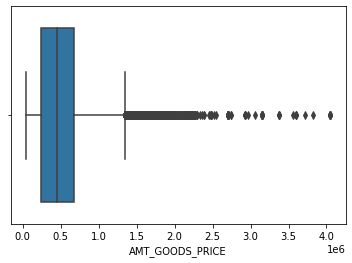

In [18]:
#We need to handle missing values in AMT_GOODS_PRICE. For which need to plot box plot to see if there are any outlier and
#which value to use for imputing

sns.boxplot(application_dropnull.AMT_GOODS_PRICE)
plt.show()

In [19]:
# we need to repalce null values with median as there are so many outiers and mean value will not be a true representation. 

AMT_Goods_Median=application_dropnull.AMT_GOODS_PRICE.median()
application_dropnull.AMT_GOODS_PRICE.fillna(AMT_Goods_Median,inplace=True)

#Verifyng the remaining null values in columns 

application_dropnull.isnull().sum()/len(application)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
ORGANIZATION_TYPE              0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021


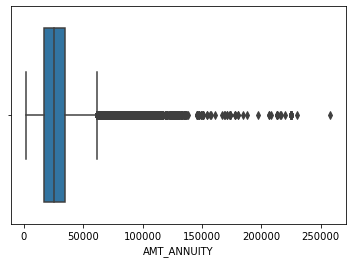

In [20]:
# verifying the spred of values for AMT_ANNUITY column as we need to impute null values in this column

sns.boxplot(application_dropnull.AMT_ANNUITY)
plt.show()

In [21]:
# we need to repalce null values with median as there are so many outiers and mean value will not be a true representation. 
AMT_ANNUITY_Median=application_dropnull.AMT_ANNUITY.median()

application_dropnull.AMT_ANNUITY.fillna(AMT_ANNUITY_Median,inplace=True)

#Verifyng the remaining null values in columns 

application_dropnull.isnull().sum()/len(application)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
OCCUPATION_TYPE                0.000000
CNT_FAM_MEMBERS                0.000650
REGION_RATING_CLIENT           0.000000
REGION_RATING_CLIENT_W_CITY    0.000000
ORGANIZATION_TYPE              0.000000
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021


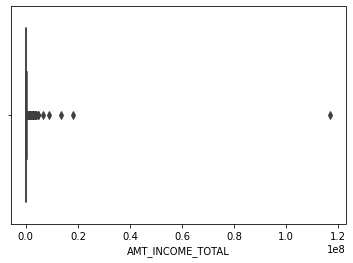

In [22]:
# Ploting income amount. 

sns.boxplot(application_dropnull.AMT_INCOME_TOTAL)
plt.show()

In [23]:
# There are mjour outlier in Amount Income column so it need to be removed as it is not represented the average population income. 
# We will remove all income rows which is greater than 1 cr 

application_dropnull= application_dropnull[~ (application_dropnull["AMT_INCOME_TOTAL"]>10000000)]

In [24]:
application_dropnull.shape

(307508, 28)

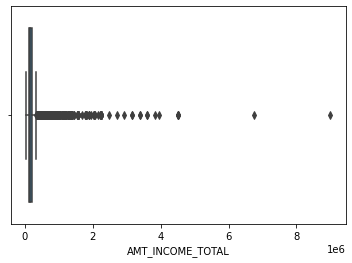

In [25]:
# Ploting income amount. 

sns.boxplot(application_dropnull.AMT_INCOME_TOTAL)
plt.show()

#Still there are outlier but we will now keep it as it is as these are business types enteries and business people can have high income.

##### We have now treateated all null values in columns. Few columns left with nul have minimum null values and may or may not get use further. So as of now we are keeping it as it is. 

In [26]:
# We now need to check the datatype of each column

application_dropnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307508 non-null  int64  
 1   TARGET                       307508 non-null  int64  
 2   NAME_CONTRACT_TYPE           307508 non-null  object 
 3   CODE_GENDER                  307508 non-null  object 
 4   FLAG_OWN_CAR                 307508 non-null  object 
 5   FLAG_OWN_REALTY              307508 non-null  object 
 6   CNT_CHILDREN                 307508 non-null  int64  
 7   AMT_INCOME_TOTAL             307508 non-null  float64
 8   AMT_CREDIT                   307508 non-null  float64
 9   AMT_ANNUITY                  307508 non-null  float64
 10  AMT_GOODS_PRICE              307508 non-null  float64
 11  NAME_INCOME_TYPE             307508 non-null  object 
 12  NAME_EDUCATION_TYPE          307508 non-null  object 
 13 

##### All columns has relevant datatypes so no need to modify it. 

In [27]:
#Describe data set to check for values

application_dropnull.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307508.000000  307508.000000  307508.000000      3.075080e+05   
mean   278180.511271       0.080726       0.417046      1.683167e+05   
std    102790.019439       0.272415       0.722118      1.011340e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.750000       0.000000       0.000000      1.125000e+05   
50%    278201.500000       0.000000       0.000000      1.471500e+05   
75%    367142.250000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      9.000000e+06   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075080e+05  307508.000000     3.075080e+05   
mean   5.990233e+05   27108.015951     5.383134e+05   
std    4.024901e+05   14492.122321     3.692876e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307508.000000  307508.000000  307508.000000   
mean                     0.020868  -16037.015362   63815.688515   
std                      0.013831    4364.003212  141276.305694   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.500000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307506.000000         307508.000000                307508.000000   
mean          2.152657              2.052464                     2.031521   
std           0.910679              0.509036                     0.502739   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306487.000000             306487.000000   
mean                   1.422256                  0.143422   
std                    2.400998                  0.446700   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
count             306487.000000             306487.000000   
mean                   1.405303                  0.100050   
std                    2.379812                  0.362292   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  344.000000                 24.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count               307508.000000  
mean                     1.643460  
std                      1.855825  
min                      0.000000  
25%                      0.000000  
50%                      1.000000  
75%                      3.000000  
max                     25.000000

### Verifying data in categorical columns 

In [28]:
application_dropnull['CODE_GENDER'].value_counts()

F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

In [29]:
application_dropnull['FLAG_OWN_CAR'].value_counts()

N    202923
Y    104585
Name: FLAG_OWN_CAR, dtype: int64

In [30]:
application_dropnull['FLAG_OWN_REALTY'].value_counts()

Y    213309
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [31]:
application_dropnull['NAME_INCOME_TYPE'].value_counts()

Working                 158773
Commercial associate     71615
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [32]:
application_dropnull['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [33]:
application_dropnull['NAME_FAMILY_STATUS'].value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [34]:
application_dropnull['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67989
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

#### We have checked for any discripencies in data for all categorical columns and found that CODE_GENDER and ORGANIZATION_TYPE has XNA values which need to be handle. Also NAME_FAMILY_STATUS has only 2 people status as unknown so need to replace with appropriate values. 

In [35]:
#Checking values in Code_gender column

application_dropnull.CODE_GENDER.value_counts()

F      202447
M      105057
XNA         4
Name: CODE_GENDER, dtype: int64

In [36]:
#We will replace XNA values with F as majority of gender are female. 

application_dropnull.CODE_GENDER.replace({"XNA":"F"}, inplace=True)
application_dropnull.CODE_GENDER.value_counts()

F    202451
M    105057
Name: CODE_GENDER, dtype: int64

In [37]:
#Now we will replace XNA values of ORGANIZATION_TYPE with Other as these values are more in number and 
#not sure about their organization type. Also we already have Other category exists. 

application_dropnull.ORGANIZATION_TYPE.replace({"XNA":"Other"}, inplace=True)
application_dropnull.ORGANIZATION_TYPE.value_counts()

Other                     72057
Business Entity Type 3    67989
Self-employed             38412
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

In [38]:
# We have only 2 values available with type as Unknown in NAME_FAMILY_STATUS column. Majourity of values are married. 
# So we will replace unknown with married

application_dropnull.NAME_FAMILY_STATUS.replace({"Unknown":"Married"}, inplace=True)
application_dropnull.NAME_FAMILY_STATUS.value_counts()

Married                 196431
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

#### DAYS_BIRTH and DAYS_EMPLOYED has negative values and need to handle. 

In [39]:
#DAYS_BIRTH has negative values. 

application_dropnull.DAYS_BIRTH.value_counts()

-13749    43
-13481    42
-10020    41
-18248    41
-10292    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [40]:
#So conveting DAYS_BIRTH into positive and dividing by 365 to convert it into year. 

application_dropnull.DAYS_BIRTH=(application_dropnull.DAYS_BIRTH.abs()/365)


In [41]:
# rounding of value to 1 decimal
application_dropnull.DAYS_BIRTH=application_dropnull.DAYS_BIRTH.round(1)

In [42]:
#Describing the dataset to verify the data

application_dropnull.DAYS_BIRTH.describe()

count    307508.000000
mean         43.937047
std          11.956124
min          20.500000
25%          34.000000
50%          43.200000
75%          53.900000
max          69.100000
Name: DAYS_BIRTH, dtype: float64

In [43]:
# DAYS_EMPLOYED also has outlier(incorrect value) and negative value. Lets verify that
application_dropnull.DAYS_EMPLOYED.value_counts()

 365243    55374
-200         156
-224         152
-199         151
-230         151
           ...  
-11115         1
-11371         1
-11883         1
-13536         1
-8795          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

In [44]:
#So conveting DAYS_EMPLOYED into positive and dividing by 365 to convert it into year. 

application_dropnull.DAYS_EMPLOYED=(application_dropnull.DAYS_EMPLOYED.abs()/365)

In [45]:
# rounding of value to 1 decimal
application_dropnull.DAYS_EMPLOYED=application_dropnull.DAYS_EMPLOYED.round(1)
application_dropnull.DAYS_EMPLOYED

0            1.7
1            3.3
2            0.6
3            8.3
4            8.3
           ...  
307506       0.6
307507    1000.7
307508      21.7
307509      13.1
307510       3.5
Name: DAYS_EMPLOYED, Length: 307508, dtype: float64

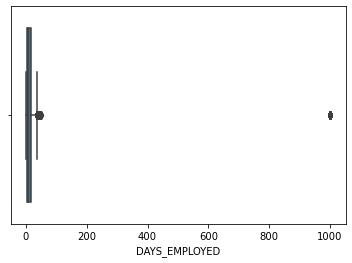

In [46]:
# need to replace 1000.7 with appropriate value so checking for distribution. 
sns.boxplot(application_dropnull.DAYS_EMPLOYED)
plt.show()

##### DAYS_EMPLOYED has one outlier 1000.7 which is incorrect. But its volume is more (almost 18%). So we can't directly replace it with mean or median. So we can replace it with NaN. It will not affect mean, median etc calculation. 

In [47]:
# Replacing 1000.7 years with NaN

application_dropnull.loc[application_dropnull.DAYS_EMPLOYED>100,"DAYS_EMPLOYED"]=np.NaN

In [48]:
# we have not repalced values with NaN and Also converted to year. 
application_dropnull.DAYS_EMPLOYED.describe()

count    252134.000000
mean          6.531916
std           6.406573
min           0.000000
25%           2.100000
50%           4.500000
75%           8.700000
max          49.100000
Name: DAYS_EMPLOYED, dtype: float64

In [49]:
# converting column name for DAYS_BIRTH and DAYS_EMPLOYED. Also verifying the dataset

application_dropnull=application_dropnull.rename(columns={"DAYS_BIRTH": "Customer_Age", "DAYS_EMPLOYED": "Employment_tenure"})

In [50]:
application_dropnull.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   Customer_Age  Employment_tenure OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0          25.9                1.7        Laborers              1.0   
1          45.9                3.3      Core staff              2.0   
2          52.2                0.6        Laborers              1.0   
3          52.1                8.3        Laborers              2.0   
4          54.6                8.3      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0

### We are now done with data cleaning part. We will now proceed with data analysis. 

#### We will first create Bins for continuous variables

In [51]:
# Creating bins for income amount

Income_bins= [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
Income_range = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

application_dropnull['AMT_INCOME_RANGE']=pd.cut(application_dropnull['AMT_INCOME_TOTAL'],bins=Income_bins,labels=Income_range)

In [52]:
# Creating bins for Credit amount

Credit_bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
Credit_range = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

application_dropnull['AMT_CREDIT_RANGE']=pd.cut(application_dropnull['AMT_CREDIT'],bins=Credit_bins,labels=Credit_range)

In [53]:
# Creating bins for AMT_GOODS_PRICE

GOODS_bins = [0,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,950000,1000000,1050000,1100000,1150000,
              1200000,1250000,1300000,1350000,1400000,1000000000]
GOODS_range = ['0-400000','400000-450000','450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000-950000','950000-1000000','1000000-1050000','1050000-1100000','1100000-1150000',
              '1150000-1200000','1200000-1250000','1250000-1300000','1300000-1350000','1350000-1400000','1400000 and above']

application_dropnull['AMT_GOODS_PRICE_RANGE']=pd.cut(application_dropnull['AMT_GOODS_PRICE'],bins=GOODS_bins,labels=GOODS_range)

In [54]:
# create bins for Customer_Age

Age_bins = [0,10,20,30,40,50,60,70]
Age_range = ["0-10","10-20","20-30","30-40","40-50","50-60","60-70"]

application_dropnull['Customer_Age_RANGE']=pd.cut(application_dropnull['Customer_Age'],bins=Age_bins,labels=Age_range)

In [55]:
# create bins for Employment_tenure

Employment_bins = [0,5,10,15,20,25,30,35,40,45,50,55,60]
Employment_range = ["0-5","5-10","10-15","15-20","20-25","25-30","30-35","35-40","40-45","45-50","50-55","55-60"]

application_dropnull['Employment_tenure_RANGE']=pd.cut(application_dropnull['Employment_tenure'],bins=Employment_bins,labels=Employment_range)

In [56]:
# checking min and max value for age to create bins

application_dropnull.Customer_Age.describe()

count    307508.000000
mean         43.937047
std          11.956124
min          20.500000
25%          34.000000
50%          43.200000
75%          53.900000
max          69.100000
Name: Customer_Age, dtype: float64

In [57]:
application_dropnull.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   Customer_Age  Employment_tenure OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0          25.9                1.7        Laborers              1.0   
1          45.9                3.3      Core staff              2.0   
2          52.2                0.6        Laborers              1.0   
3          52.1                8.3        Laborers              2.0   
4          54.6                8.3      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     2                            2              Government   
3                     2                            2  Business Entity Type 3   
4                     2                            2                Religion   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE  AMT_CREDIT_RANGE  \
0                         1.0    200000-225000     400000-450000   
1                         0.0    250000-275000  900000 and above   
2                         0.0      50000-75000          0-150000   
3                         0.0    125000-150000     300000-350000   
4                         0.0    100000-125000     500000-550000   

  AMT_GOODS_PRICE_RANGE Customer_Age_RANGE Employment_tenure_RANGE  
0              0-400000              20-30                     0-5  
1       1100000-1150000              40-50                     0-5  
2              0-400000              50-60 

### Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

In [58]:
# creating 2 dataframes based on Target variable

Non_Defaulter=application_dropnull.loc[application_dropnull["TARGET"]==0]
Defaulter=application_dropnull.loc[application_dropnull["TARGET"]==1]

In [59]:
# checking shape of Non-Defaulter dataset

Non_Defaulter.shape

(282684, 33)

In [60]:
#checking shape of defaulter dataset

Defaulter.shape

(24824, 33)

#### We need to find the imbalance % between 2 new data sets based on Target variables

In [61]:
# calculate imbalance %. Since there is majourity of Non_defaulter, we will calculate it as below:

round(len(Non_Defaulter)/len(Defaulter),2)

11.39

#### The imbalance ratio is 11.39:1

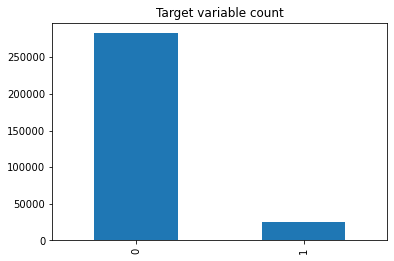

In [62]:
application_dropnull.TARGET.value_counts().plot(kind="bar",title="Target variable count")
plt.show()

#### Consculsion: From this we observe that Non_defaulter are more than defaulter

# Analysis for Target 0 (Non_Defaulter) 

### Univariate Analysis

### Categorical Unordered univariate analysis 
- Gender
- Income type
- Family status

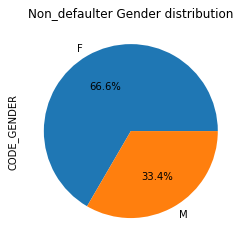

In [63]:
#looking for pattern of gender distribution for Non_defaulter

Non_Defaulter.CODE_GENDER.value_counts(normalize=True).plot(kind="pie",title="Non_defaulter Gender distribution", autopct='%1.1f%%')
plt.show()

### Observations: 
- We observed that Majority of Female(67%) are not facing difficulty in paying the loan

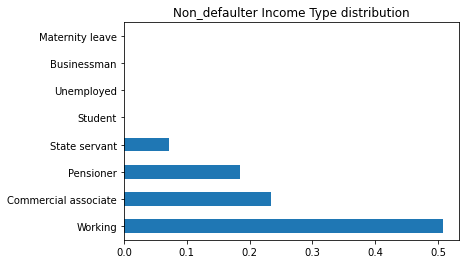

In [64]:
# Looking for distribution of NAME_INCOME_TYPE

Non_Defaulter.NAME_INCOME_TYPE.value_counts(normalize=True).plot(kind="barh",title="Non_defaulter Income Type distribution")
plt.show()

### Observations:
- Almost 55% of Wokring professional are not facing the difficulty in paying the loan. 
- People with Maternity leave, Business man, Unemployed and Student have very less % but still have less % in Non Defaulter

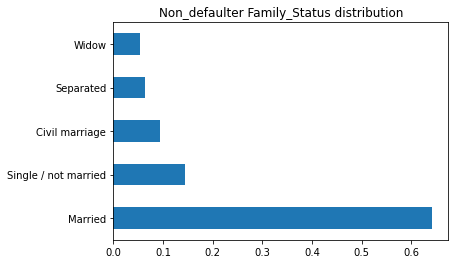

In [65]:
# Looking for NAME_FAMILY_STATUS distribution for Non_defaulter

Non_Defaulter.NAME_FAMILY_STATUS.value_counts(normalize=True).plot(kind="barh",title="Non_defaulter Family_Status distribution")
plt.show()

### Observations:
- Married people have more % of Non defaulter 
- No much conclusion from this

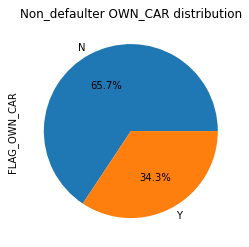

In [66]:
#looking for pattern of FLAG_OWN_CAR distribution for Non_defaulter

Non_Defaulter.FLAG_OWN_CAR.value_counts(normalize=True).plot(kind="pie",title="Non_defaulter OWN_CAR distribution", autopct='%1.1f%%')
plt.show()

### Observations:
- 66% of Non defualter do not own a Car

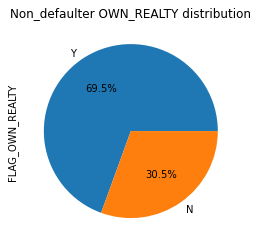

In [67]:
#looking for pattern of FLAG_OWN_REALTY distribution for Non_defaulter

Non_Defaulter.FLAG_OWN_REALTY.value_counts(normalize=True).plot(kind="pie",title="Non_defaulter OWN_REALTY distribution", autopct='%1.1f%%')
plt.show()

### Observations:
- 70% of Non defaulter own a house

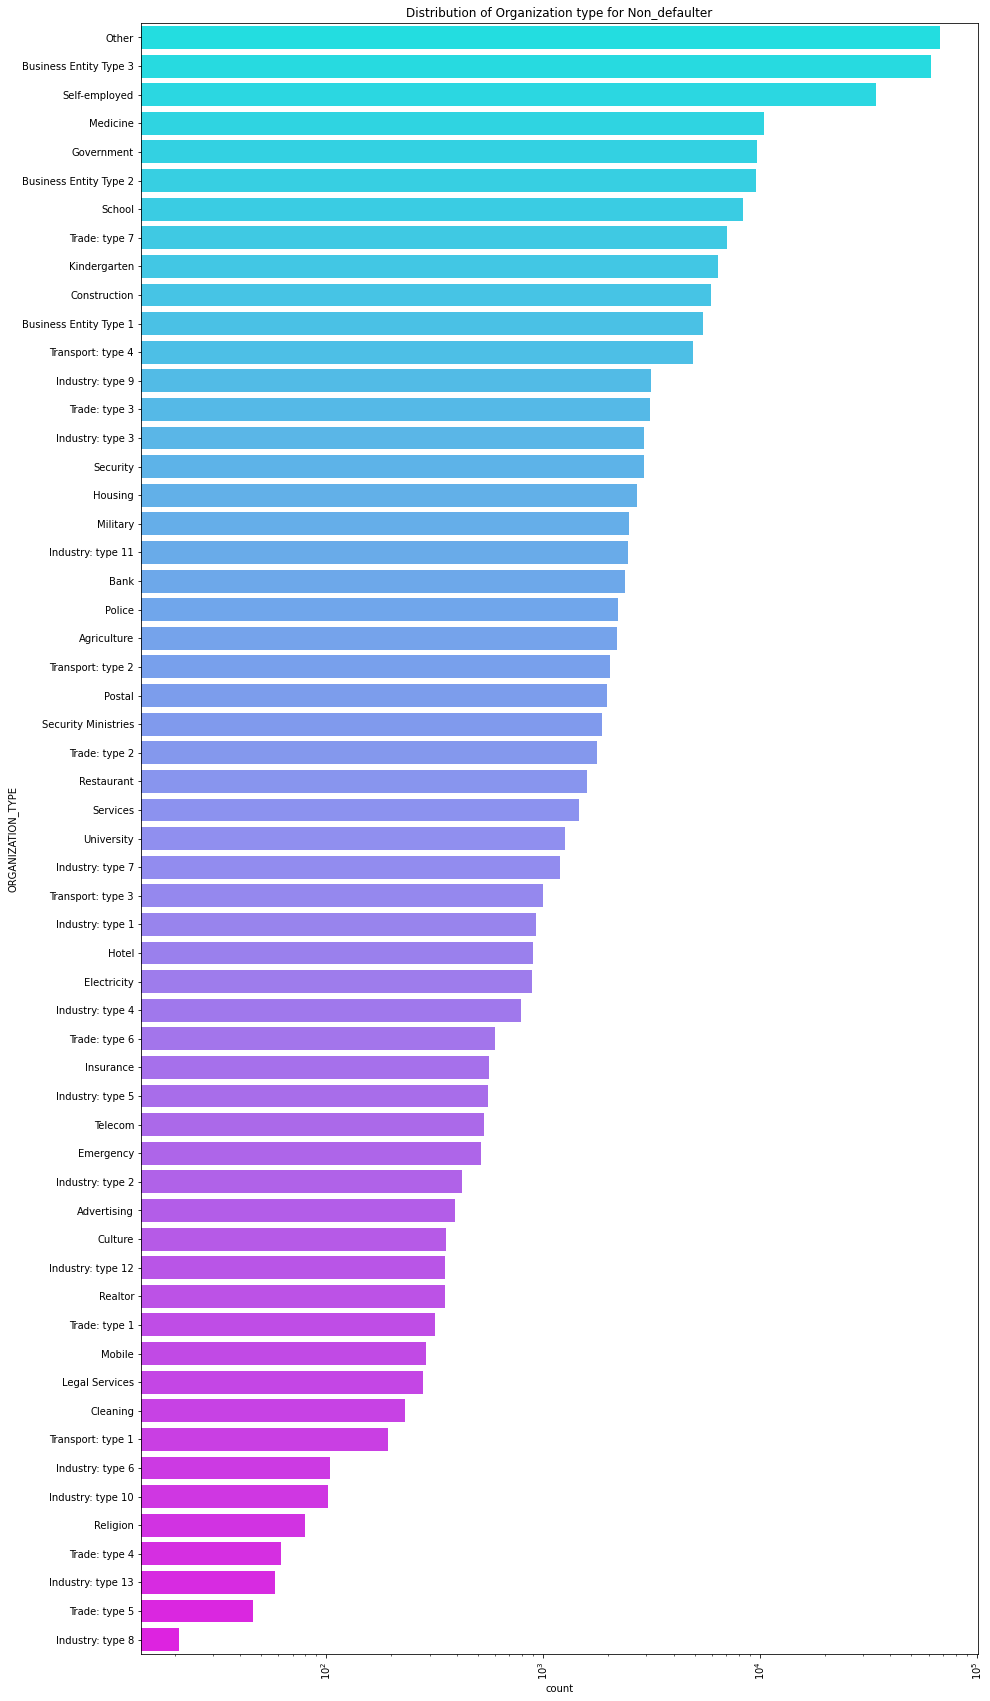

In [68]:
# Plotting for Organization type in logarithmic scale


plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for Non_defaulter")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=Non_Defaulter,y='ORGANIZATION_TYPE',order=Non_Defaulter['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

### Observations:
- People with Business entity Type 3 and self employeed are majourity in non defaulter
- There are less people from industry type 8 in non defaulter

### Categorical Ordered univariate analysis 

- Education
- Age
- employment tenure
- Income amount

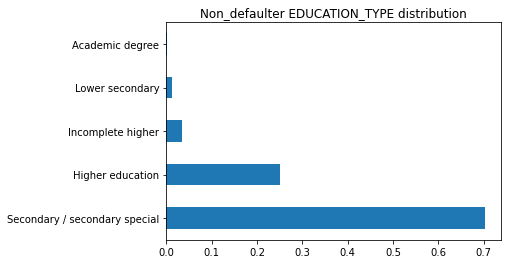

In [69]:
# Looking for NAME_EDUCATION_TYPE distribution for Non_defaulter

Non_Defaulter.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot(kind="barh",title="Non_defaulter EDUCATION_TYPE distribution")
plt.show()

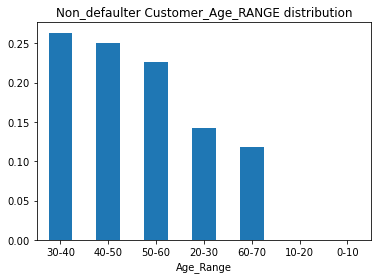

In [70]:
# Looking for Customer_Age_RANGE distribution for Non_defaulter

Non_Defaulter.Customer_Age_RANGE.value_counts(normalize=True).plot(kind="bar",title="Non_defaulter Customer_Age_RANGE distribution",rot=0)
plt.xlabel("Age_Range")
plt.show()

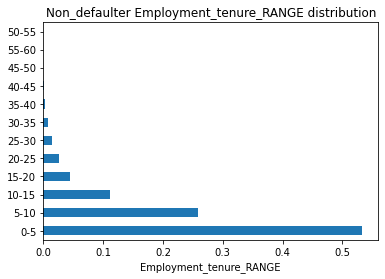

In [71]:
# Looking for Employment_tenure_RANGE distribution for Non_defaulter

Non_Defaulter.Employment_tenure_RANGE.value_counts(normalize=True).plot(kind="barh",title="Non_defaulter Employment_tenure_RANGE distribution",rot=0)
plt.xlabel("Employment_tenure_RANGE")
plt.show()

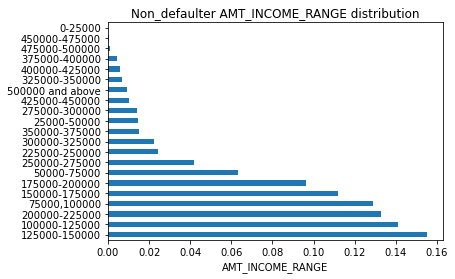

In [72]:
# Looking for AMT_INCOME_RANGE distribution for Non_defaulter

Non_Defaulter.AMT_INCOME_RANGE.value_counts(normalize=True).plot(kind="barh",title="Non_defaulter AMT_INCOME_RANGE distribution",rot=0)
plt.xlabel("AMT_INCOME_RANGE")
plt.show()

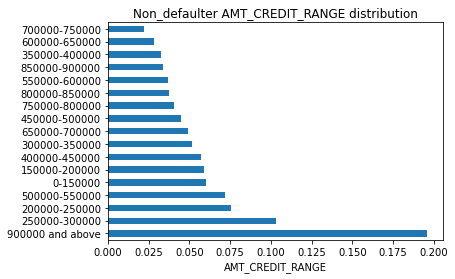

In [73]:
# Looking for AMT_CREDIT_RANGE distribution for Non_defaulter

Non_Defaulter.AMT_CREDIT_RANGE.value_counts(normalize=True).plot(kind="barh",title="Non_defaulter AMT_CREDIT_RANGE distribution",rot=0)
plt.xlabel("AMT_CREDIT_RANGE")
plt.show()

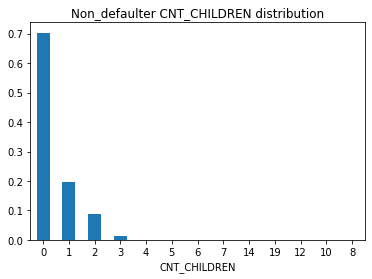

In [74]:
# Looking for CNT_CHILDREN distribution for Non_defaulter

Non_Defaulter.CNT_CHILDREN.value_counts(normalize=True).plot(kind="bar",title="Non_defaulter CNT_CHILDREN distribution",rot=0)
plt.xlabel("CNT_CHILDREN")
plt.show()

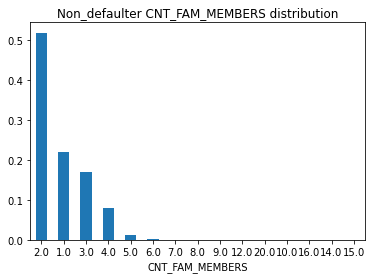

In [75]:
# Looking for CNT_FAM_MEMBERS distribution for Non_defaulter

Non_Defaulter.CNT_FAM_MEMBERS.value_counts(normalize=True).plot(kind="bar",title="Non_defaulter CNT_FAM_MEMBERS distribution",rot=0)
plt.xlabel("CNT_FAM_MEMBERS")
plt.show()

# Bivariate and Multivariate Analysis

### Numeric- numeric analysis 
- Income Vs credit

### Numeric- Categorical analysis 
- Income Range Vs Gender
- Age range Vs Amount Income 
- Age Vs Gender
- Education Type Vs Amount Credit Vs Family status 
- Education Type Vs Amount Income Vs Family status 

### Categorical- Categorical analysis
- Controct Type Vs Gender 

### Correlational Analysis
- We will plot heat map to see the correlation 

### Numeric- numeric analysis 

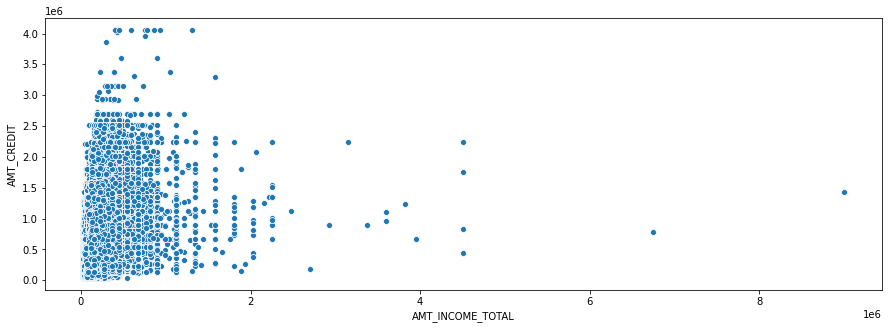

In [76]:
#Ploting scatter plot to see the variation of AMT_INCOME_TOTAL and AMT_CREDIT

plt.figure(figsize=[15,5])

sns.scatterplot(data= Non_Defaulter, x= 'AMT_INCOME_TOTAL', y= 'AMT_CREDIT')

plt.show()

### Observations:
- Total income has few outliers
- Maximum people with credit fall under income of 2.5 lacs. 

### Numeric- Categorical analysis 

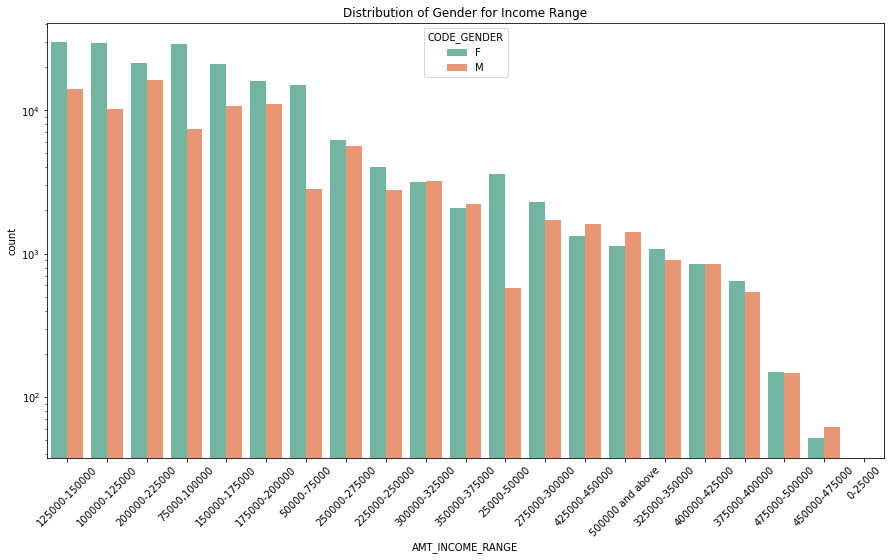

In [77]:
#we will plot countplot to see the distribution of Gender across income range

plt.figure(figsize=(15,8))
ax = sns.countplot(data = Non_Defaulter, x= 'AMT_INCOME_RANGE',hue= 'CODE_GENDER', palette="Set2", order= Non_Defaulter.AMT_INCOME_RANGE.value_counts().index)
plt.title('Distribution of Gender for Income Range')
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

### Observations:
- Mostely Female have higher income than Males. 
- People with 50000-225000 income face less difficulty in paying loan. 
- Income range from 100000-150000 is very good range to pay the loan. 

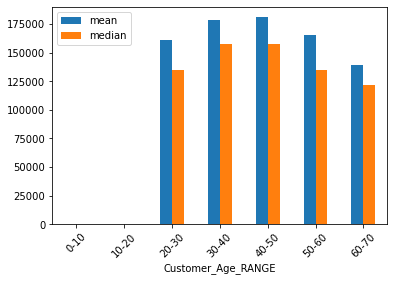

In [78]:
# We will plot Income distribution accross age group vs Income

Non_Defaulter.groupby("Customer_Age_RANGE")["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.bar()
plt.xticks(rotation=45)
plt.show()

### Observations:

- Age group from 30-50 have more average income (more than 150000)

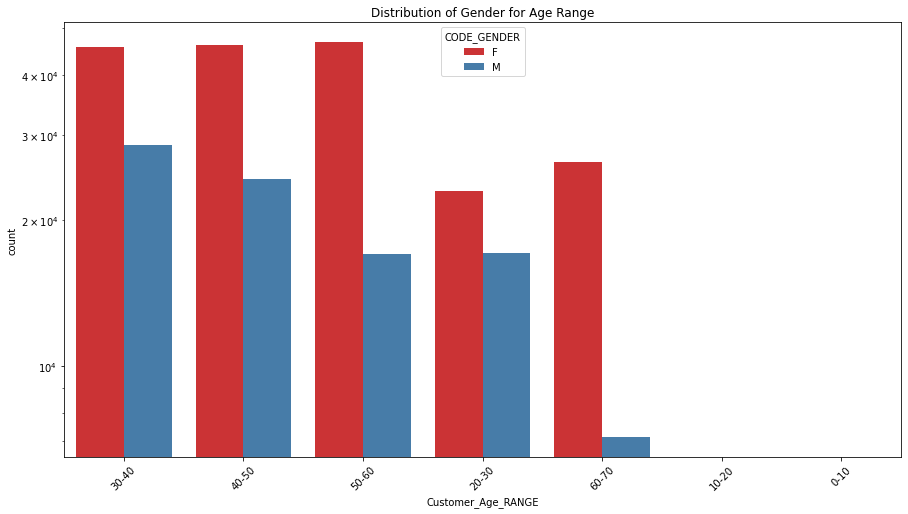

In [79]:
# We will plot Gender distribution accross Age range

plt.figure(figsize=(15,8))
ax = sns.countplot(data = Non_Defaulter, x= 'Customer_Age_RANGE',hue= 'CODE_GENDER', palette="Set1", order= Non_Defaulter.Customer_Age_RANGE.value_counts().index)
plt.title('Distribution of Gender for Age Range')
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

### Observations:
- Maximum number of Female fall under age range 50-70. 
- More number of males belongs to age group 30-50. 

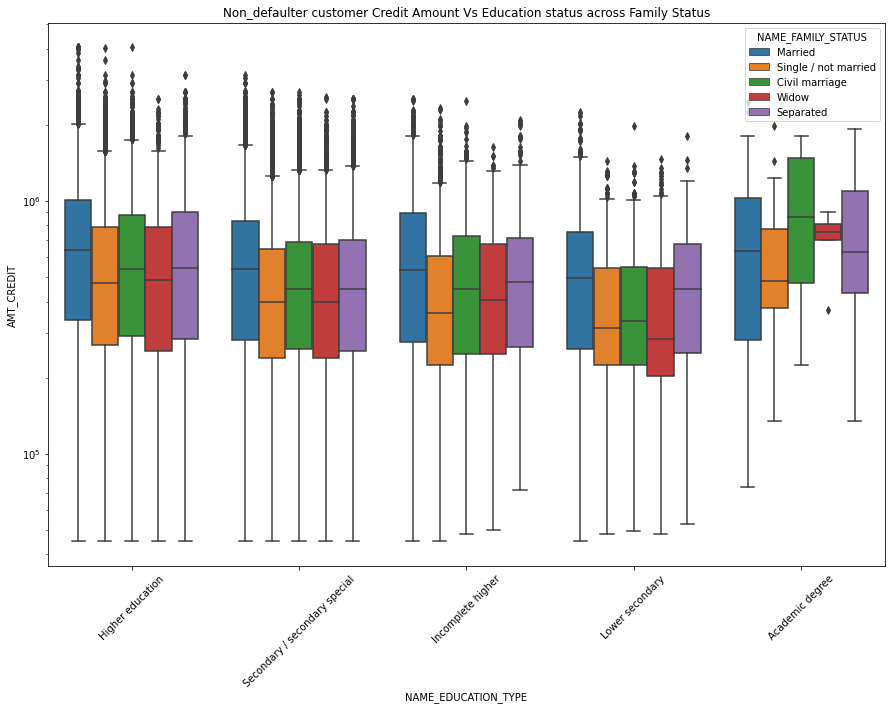

In [80]:
# Box plotting for Credit amount for Eduation type accross family type 

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data =Non_Defaulter, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Non_defaulter customer Credit Amount Vs Education status across Family Status')
plt.yscale('log')
plt.show()

### Observations:
- Civil Marriage person with Academic Education has highest amount of credit. 
- In general, people with academic degree have high credit. 
- Married people have higher amount of credit for all education type except Academic. 

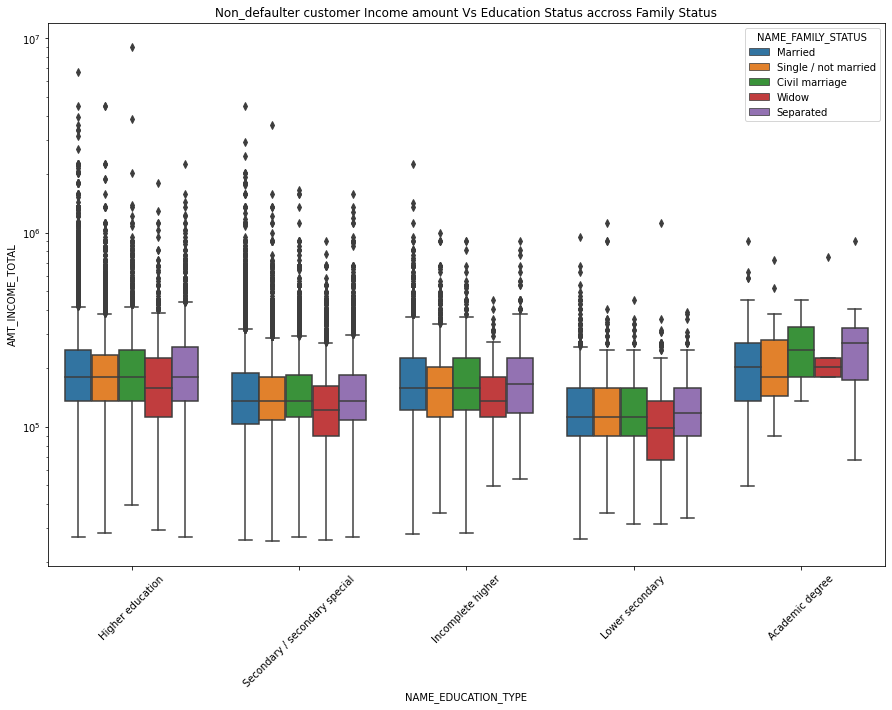

In [81]:
#Box plotting for Income amount vs Education status accross family status in logarithmic scale

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =Non_Defaulter, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Non_defaulter customer Income amount Vs Education Status accross Family Status')
plt.show()

### Observations:
- Civil marriage persons with Academic degree have higher income than all other. 
- People with Academic degree have higher income. 
- Married persons have higher income that all other except with Academic degree. 
- People with Lower secondary degree have lower incomes than All other. 


### Categorical-Categorical Analysis

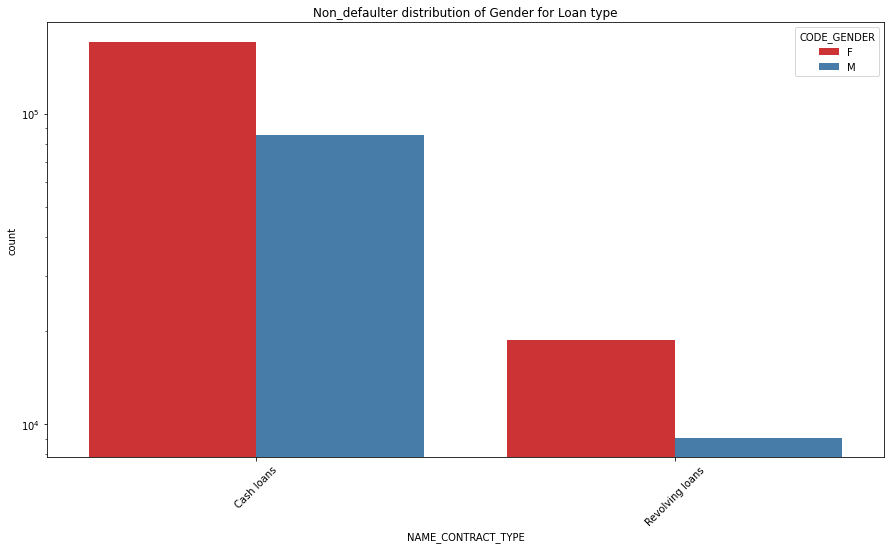

In [82]:
#we will plot countplot to see the distribution of Gender across loan types

plt.figure(figsize=(15,8))
ax = sns.countplot(data = Non_Defaulter, x= 'NAME_CONTRACT_TYPE',hue= 'CODE_GENDER', palette="Set1", order= Non_Defaulter.NAME_CONTRACT_TYPE.value_counts().index)
plt.title('Non_defaulter distribution of Gender for Loan type')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

### We will plot heatmap to see the correlation between numerical columns

In [83]:
# Finding some correlation for numerical columns in Non_Defaulter by creating pivot table

Non_Defaulter_corr=Non_Defaulter.iloc[0:,2:-5]
Non_Defaulter_New=Non_Defaulter_corr.corr(method='spearman')
Non_Defaulter_New

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000          0.038301    0.002316   
AMT_INCOME_TOTAL                 0.038301          1.000000    0.416011   
AMT_CREDIT                       0.002316          0.416011    1.000000   
AMT_ANNUITY                      0.024760          0.485678    0.831885   
AMT_GOODS_PRICE                 -0.001321          0.419713    0.984995   
REGION_POPULATION_RELATIVE      -0.025556          0.097760    0.053562   
Customer_Age                    -0.375648         -0.093505    0.057149   
Employment_tenure               -0.030985          0.060855    0.104256   
CNT_FAM_MEMBERS                  0.810517          0.044979    0.079494   
REGION_RATING_CLIENT             0.019538         -0.209521   -0.087614   
REGION_RATING_CLIENT_W_CITY      0.017698         -0.229683   -0.097047   
OBS_30_CNT_SOCIAL_CIRCLE         0.022532         -0.028987    0.003050   
DEF_30_CNT_SOCIAL_CIRCLE        -0.001276         -0.032754   -0.015643   
OBS_60_CNT_SOCIAL_CIRCLE         0.022199         -0.028723    0.003126   
DEF_60_CNT_SOCIAL_CIRCLE        -0.001734         -0.033944   -0.018722   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.026528          0.086863   -0.007670   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.024760        -0.001321   
AMT_INCOME_TOTAL                0.485678         0.419713   
AMT_CREDIT                      0.831885         0.984995   
AMT_ANNUITY                     1.000000         0.829801   
AMT_GOODS_PRICE                 0.829801         1.000000   
REGION_POPULATION_RELATIVE      0.058578         0.062617   
Customer_Age                   -0.011739         0.058341   
Employment_tenure               0.074633         0.109303   
CNT_FAM_MEMBERS                 0.096414         0.079324   
REGION_RATING_CLIENT           -0.116838        -0.089749   
REGION_RATING_CLIENT_W_CITY    -0.130757        -0.098691   
OBS_30_CNT_SOCIAL_CIRCLE       -0.009429         0.002445   
DEF_30_CNT_SOCIAL_CIRCLE       -0.018547        -0.016717   
OBS_60_CNT_SOCIAL_CIRCLE       -0.009203         0.002558   
DEF_60_CNT_SOCIAL_CIRCLE       -0.020809        -0.019395   
AMT_REQ_CREDIT_BUREAU_YEAR      0.010527        -0.008781   

                             REGION_POPULATION_RELATIVE  Customer_Age  \
CNT_CHILDREN                                  -0.025556     -0.375648   
AMT_INCOME_TOTAL                               0.097760     -0.093505   
AMT_CREDIT                                     0.053562      0.057149   
AMT_ANNUITY                                    0.058578     -0.011739   
AMT_GOODS_PRICE                                0.062617      0.058341   
REGION_POPULATION_RELATIVE                     1.000000      0.030729   
Customer_Age                                   0.030729      1.000000   
Employment_tenure                             -0.000865      0.307780   
CNT_FAM_MEMBERS                               -0.017717     -0.282415   
REGION_RATING_CLIENT                          -0.426027     -0.003177   
REGION_RATING_CLIENT_W_CITY                   -0.433166     -0.001629   
OBS_30_CNT_SOCIAL_CIRCLE                       0.011868     -0.021760   
DEF_30_CNT_SOCIAL_CIRCLE                       0.028530     -0.000491   
OBS_60_CNT_SOCIAL_CIRCLE                       0.012430     -0.021386   
DEF_60_CNT_SOCIAL_CIRCLE                       0.023839     -0.002379   
AMT_REQ_CREDIT_BUREAU_YEAR                     0.002351      0.067739   

                             Employment_tenure  CNT_FAM_MEMBERS  \
CNT_CHILDREN                         -0.030985         0.810517   
AMT_INCOME_TOTAL                      0.060855         0.044979   
AMT_CREDIT                            0.104256         0.079494   
AMT_ANNUITY                           0.074633         0.096414   
AMT_GOODS_PRICE                       0.109303         0.079324   
REGION_POPULATION_RELATIVE           -0.000865        -0.017717   
Cust

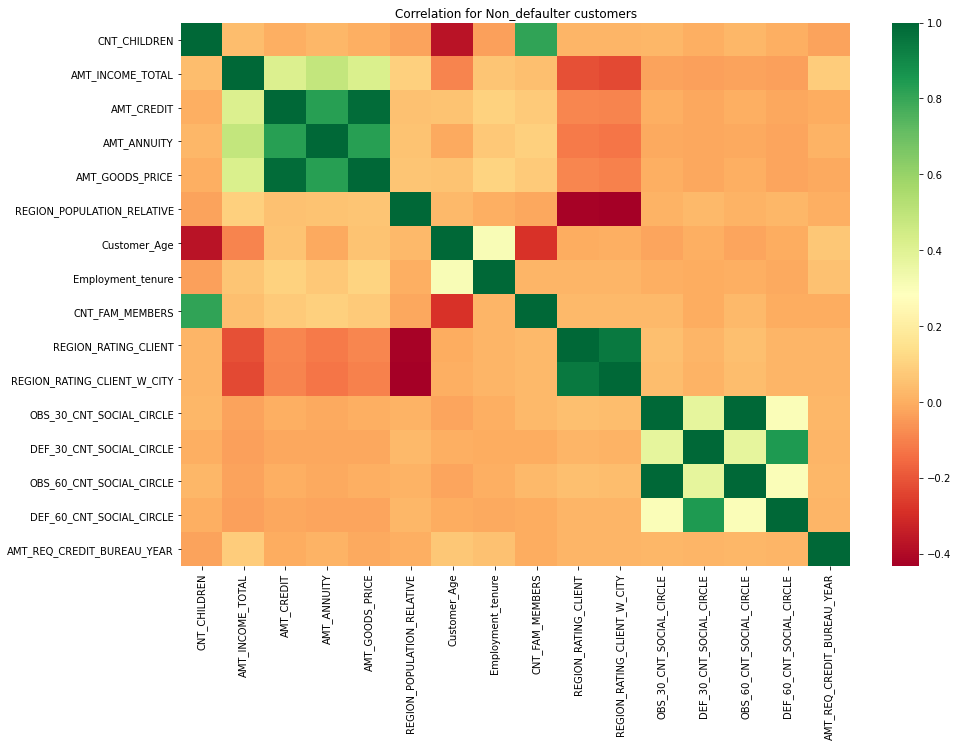

In [84]:
# we will draw a heat map now for Non_defaulter dataset

plt.figure(figsize=(15, 10))
sns.heatmap(data= Non_Defaulter_New, cmap="RdYlGn",annot=False)
plt.title('Correlation for Non_defaulter customers')
plt.yticks(rotation=0)
plt.show()

### Observations:
- Count of children has correlation with family members
- Income, Annuity and credit has correlation 

# Analysis for Target 1 (Defaulter)

### Univariate Analysis

### Categorical Unordered univariate analysis 
- Gender
- Income type
- Family status

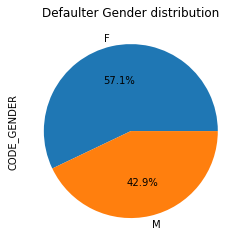

In [85]:
#looking for pattern of gender distribution for Defaulter

Defaulter.CODE_GENDER.value_counts(normalize=True).plot(kind="pie",title="Defaulter Gender distribution", autopct='%1.1f%%')
plt.show()

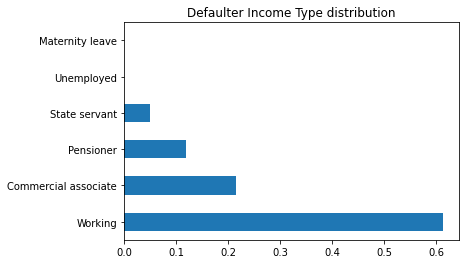

In [86]:
# Looking for distribution of NAME_INCOME_TYPE

Defaulter.NAME_INCOME_TYPE.value_counts(normalize=True).plot(kind="barh",title="Defaulter Income Type distribution")
plt.show()

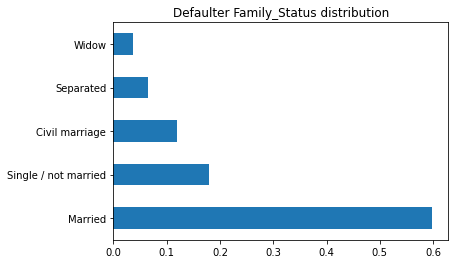

In [87]:
# Looking for NAME_FAMILY_STATUS distribution for Defaulter

Defaulter.NAME_FAMILY_STATUS.value_counts(normalize=True).plot(kind="barh",title="Defaulter Family_Status distribution")
plt.show()

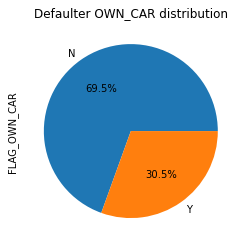

In [88]:
#looking for pattern of FLAG_OWN_CAR distribution for Defaulter

Defaulter.FLAG_OWN_CAR.value_counts(normalize=True).plot(kind="pie",title="Defaulter OWN_CAR distribution", autopct='%1.1f%%')
plt.show()

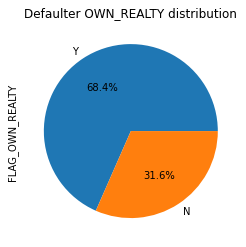

In [89]:
#looking for pattern of FLAG_OWN_REALTY distribution for Defaulter

Defaulter.FLAG_OWN_REALTY.value_counts(normalize=True).plot(kind="pie",title="Defaulter OWN_REALTY distribution", autopct='%1.1f%%')
plt.show()

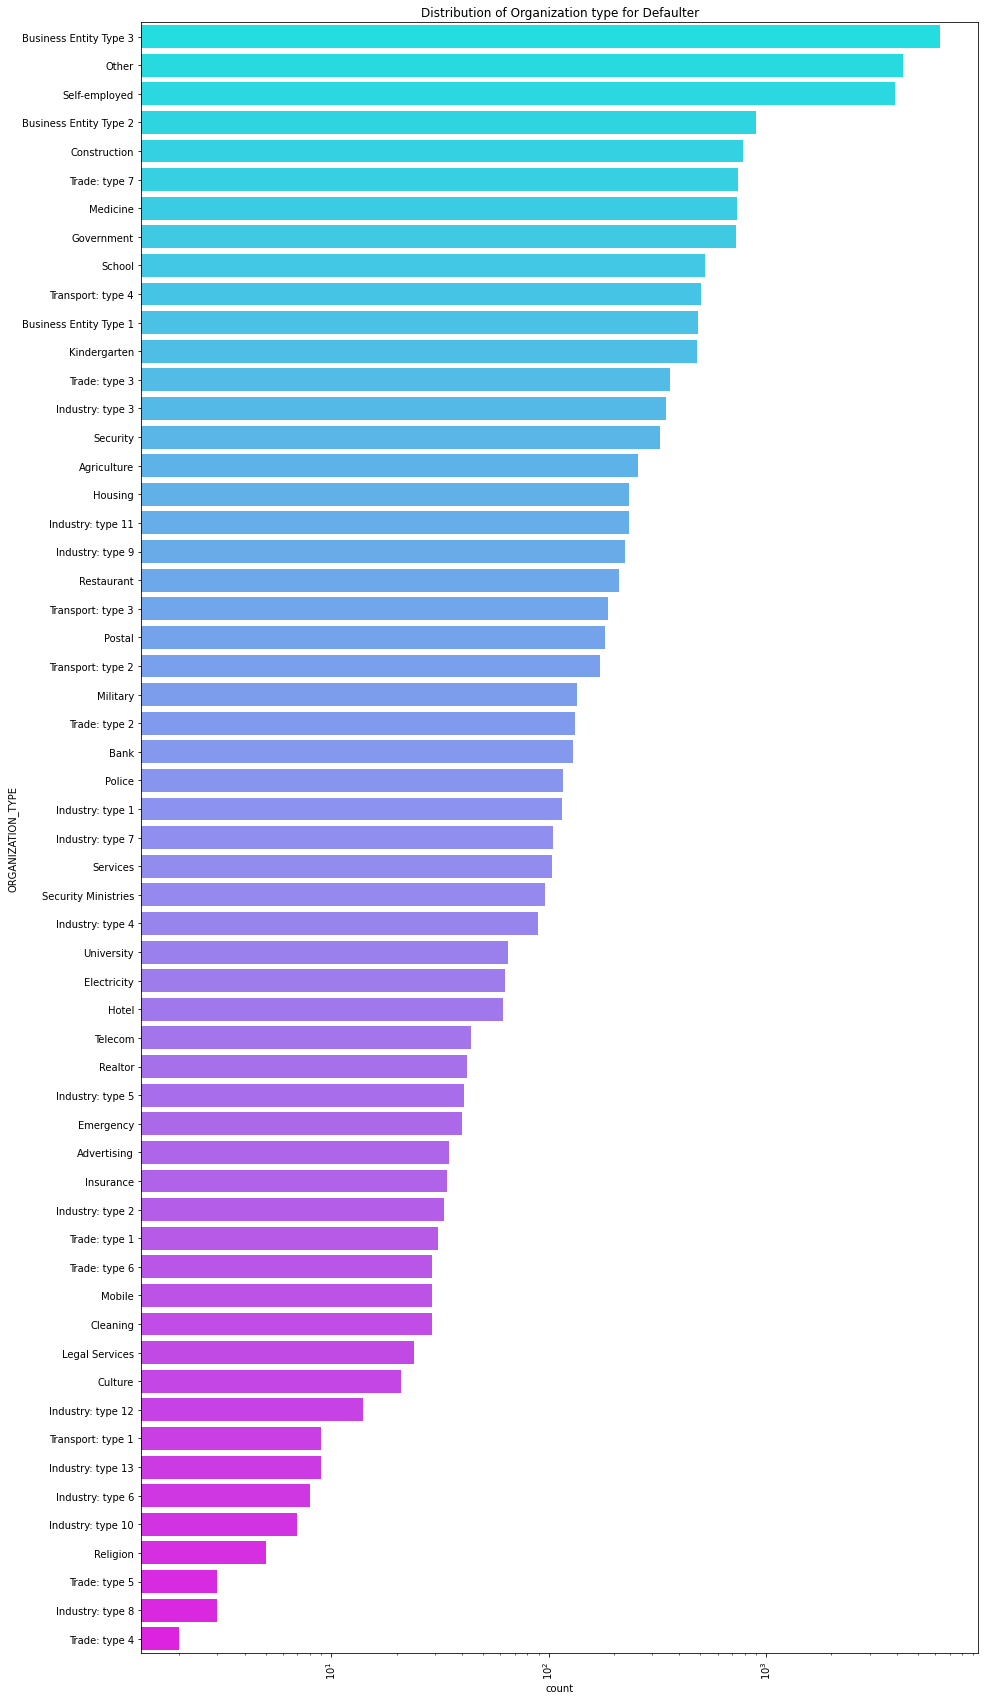

In [90]:
# Plotting for Organization type in logarithmic scale

plt.figure(figsize=(15,30))
plt.title("Distribution of Organization type for Defaulter")
plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=Defaulter,y='ORGANIZATION_TYPE',order=Defaulter['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

### Categorical Ordered univariate analysis 

- Education
- Age
- employment tenure
- Income amount

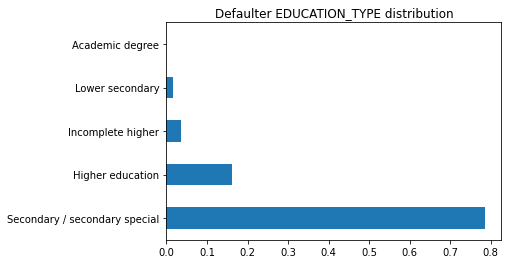

In [91]:
# Looking for NAME_EDUCATION_TYPE distribution for Defaulter

Defaulter.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot(kind="barh",title="Defaulter EDUCATION_TYPE distribution")
plt.show()

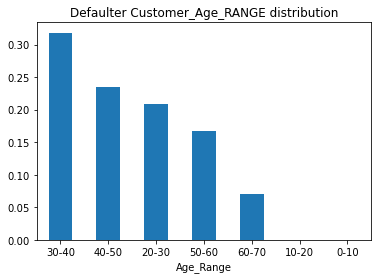

In [92]:
# Looking for Customer_Age_RANGE distribution for Defaulter

Defaulter.Customer_Age_RANGE.value_counts(normalize=True).plot(kind="bar",title="Defaulter Customer_Age_RANGE distribution",rot=0)
plt.xlabel("Age_Range")
plt.show()

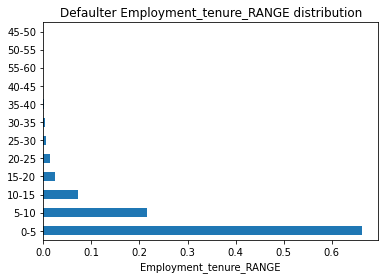

In [93]:
# Looking for Employment_tenure_RANGE distribution for Defaulter

Defaulter.Employment_tenure_RANGE.value_counts(normalize=True).plot(kind="barh",title="Defaulter Employment_tenure_RANGE distribution",rot=0)
plt.xlabel("Employment_tenure_RANGE")
plt.show()

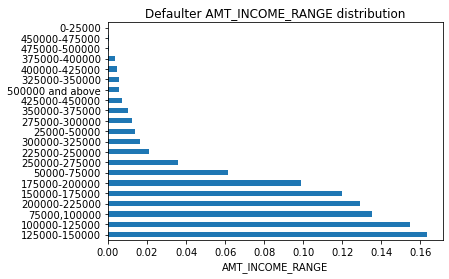

In [94]:
# Looking for AMT_INCOME_RANGE distribution for Defaulter

Defaulter.AMT_INCOME_RANGE.value_counts(normalize=True).plot(kind="barh",title="Defaulter AMT_INCOME_RANGE distribution",rot=0)
plt.xlabel("AMT_INCOME_RANGE")
plt.show()

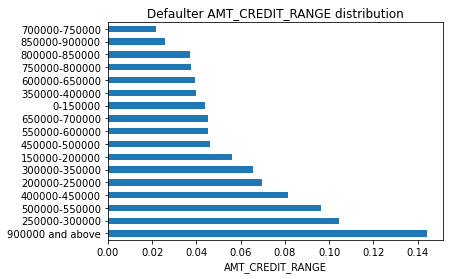

In [95]:
# Looking for AMT_CREDIT_RANGE distribution for Defaulter

Defaulter.AMT_CREDIT_RANGE.value_counts(normalize=True).plot(kind="barh",title="Defaulter AMT_CREDIT_RANGE distribution",rot=0)
plt.xlabel("AMT_CREDIT_RANGE")
plt.show()

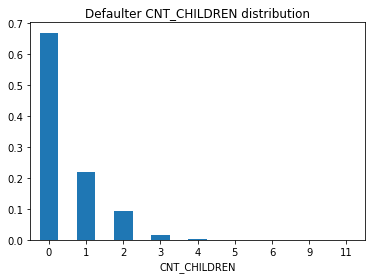

In [96]:
# Looking for CNT_CHILDREN distribution for Defaulter

Defaulter.CNT_CHILDREN.value_counts(normalize=True).plot(kind="bar",title="Defaulter CNT_CHILDREN distribution",rot=0)
plt.xlabel("CNT_CHILDREN")
plt.show()

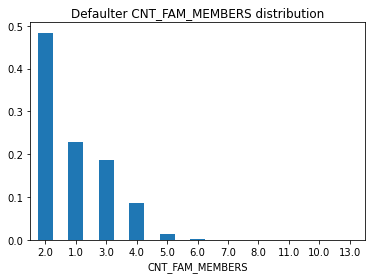

In [97]:
# Looking for CNT_FAM_MEMBERS distribution for Defaulter

Defaulter.CNT_FAM_MEMBERS.value_counts(normalize=True).plot(kind="bar",title="Defaulter CNT_FAM_MEMBERS distribution",rot=0)
plt.xlabel("CNT_FAM_MEMBERS")
plt.show()

# Bivariate and Multivariate Analysis

### Numeric- numeric analysis 
- Income Vs credit

### Numeric- Categorical analysis 
- Income Range Vs Gender
- Age range Vs Amount Income 
- Age Vs Gender
- Education Type Vs Amount Credit Vs Family status 
- Education Type Vs Amount Income Vs Family status 

### Categorical- Categorical analysis
- contract type

### Correlational Analysis
- We will plot heat map to see the correlation 

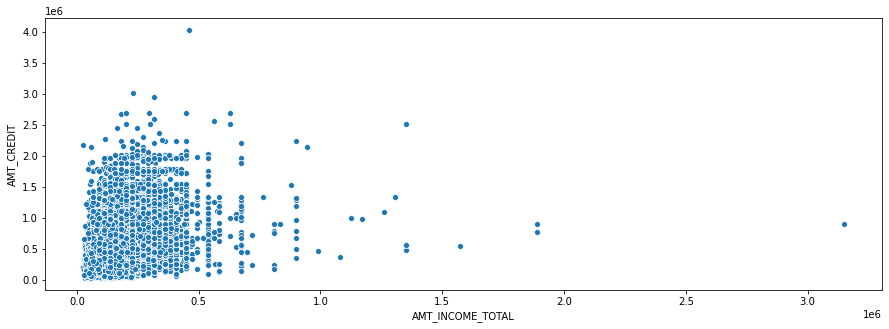

In [98]:
#Ploting scatter plot to see the variation of AMT_INCOME_TOTAL and AMT_CREDIT

plt.figure(figsize=[15,5])

sns.scatterplot(data= Defaulter, x= 'AMT_INCOME_TOTAL', y= 'AMT_CREDIT')

plt.show()

### Numeric- Categorical analysis 

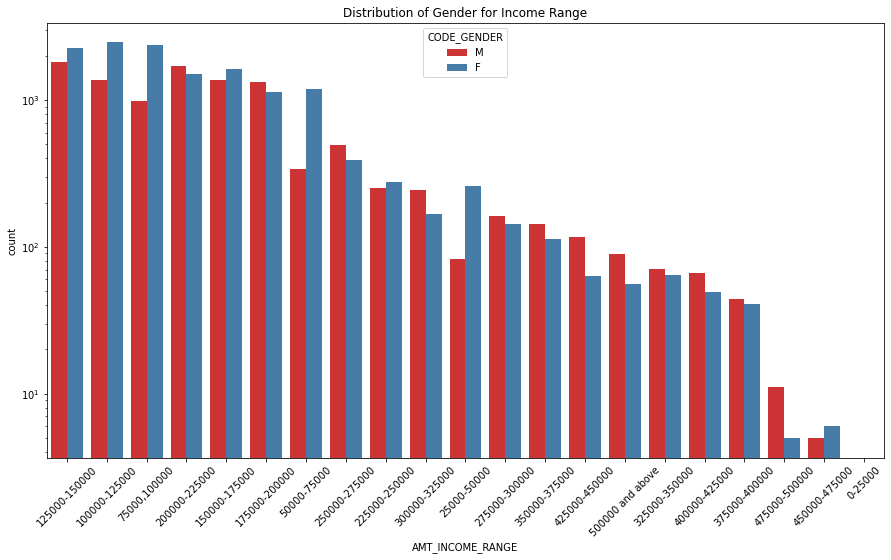

In [99]:
#we will plot countplot to see the distribution of Gender across income range

plt.figure(figsize=(15,8))
ax = sns.countplot(data = Defaulter, x= 'AMT_INCOME_RANGE',hue= 'CODE_GENDER', palette="Set1", order= Defaulter.AMT_INCOME_RANGE.value_counts().index)
plt.title('Distribution of Gender for Income Range')
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

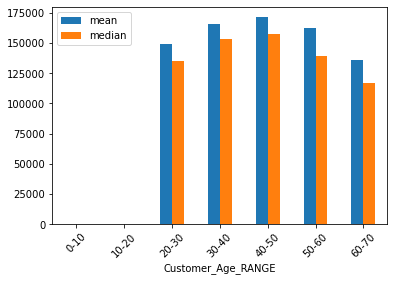

In [100]:
# We will plot Income distribution accross age group vs Income

Defaulter.groupby("Customer_Age_RANGE")["AMT_INCOME_TOTAL"].aggregate(["mean","median"]).plot.bar()
plt.xticks(rotation=45)
plt.show()

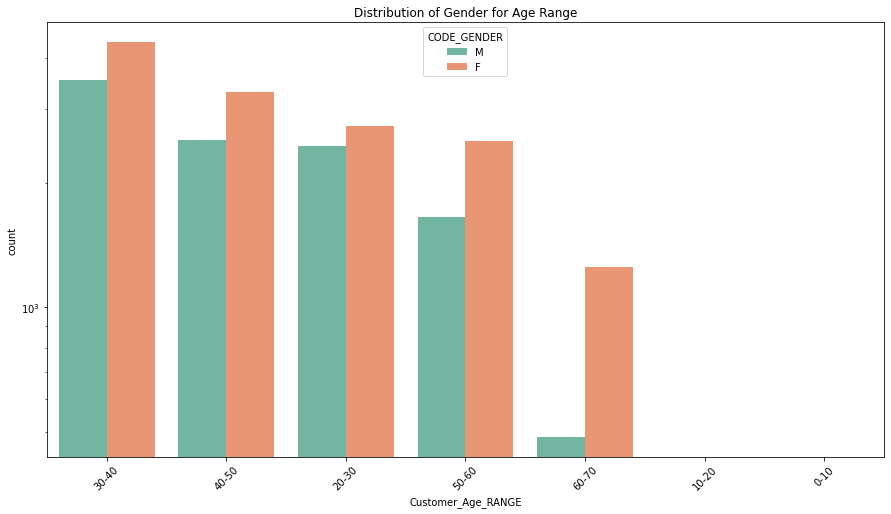

In [101]:
# We will plot Gender distribution accross Age range

plt.figure(figsize=(15,8))
ax = sns.countplot(data = Defaulter, x= 'Customer_Age_RANGE',hue= 'CODE_GENDER', palette="Set2", order= Defaulter.Customer_Age_RANGE.value_counts().index)
plt.title('Distribution of Gender for Age Range')
plt.xticks(rotation=45)
plt.yscale('log')

plt.show()

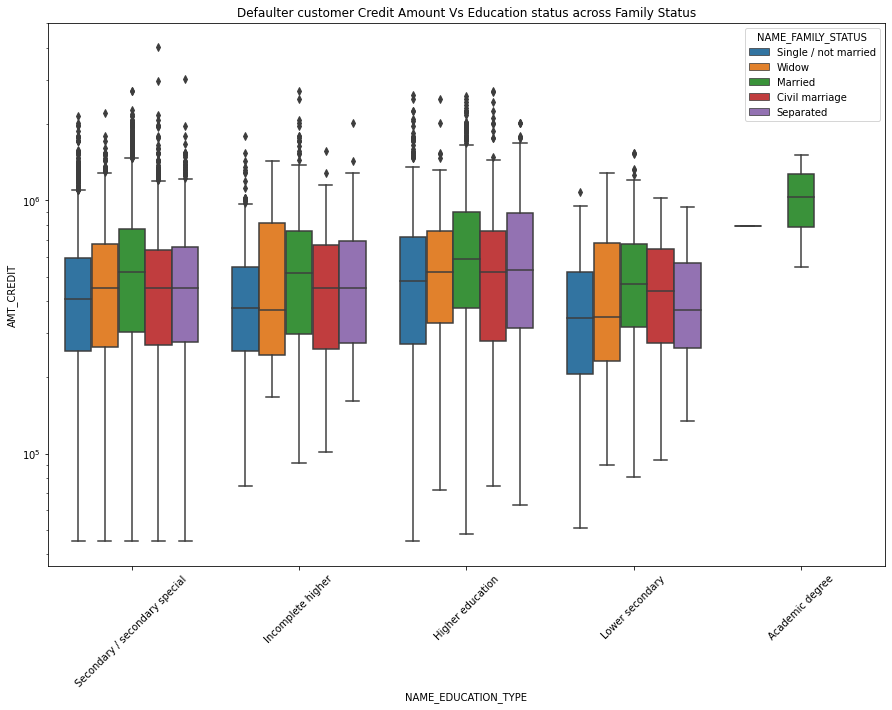

In [102]:
# Box plotting for Credit amount for Eduation type accross family type 

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
sns.boxplot(data =Defaulter, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Defaulter customer Credit Amount Vs Education status across Family Status')
plt.yscale('log')
plt.show()

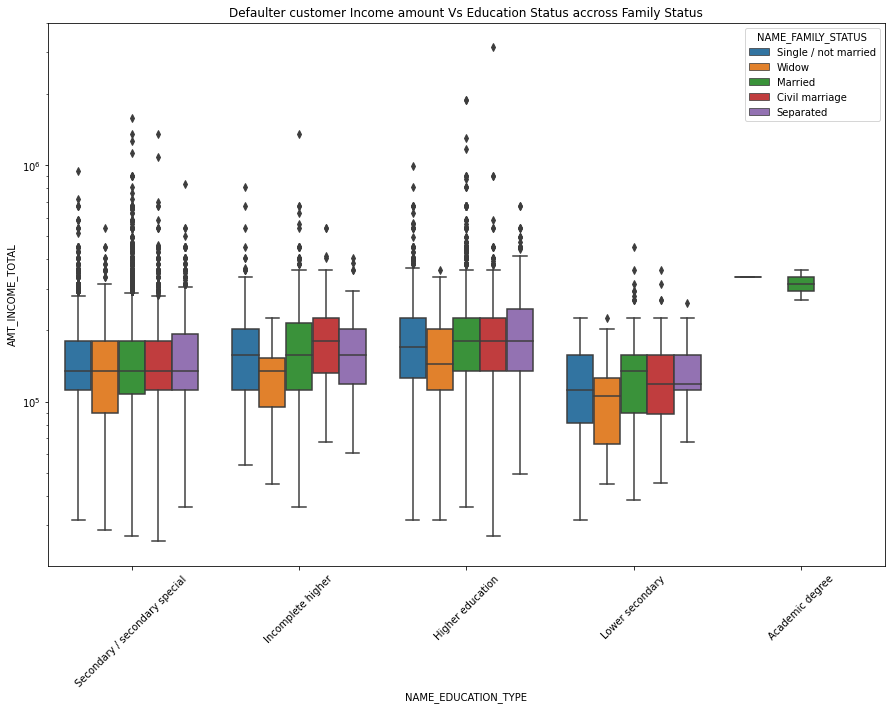

In [103]:
#Box plotting for Income amount vs Education status accross family status in logarithmic scale

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data = Defaulter, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Defaulter customer Income amount Vs Education Status accross Family Status')
plt.show()

### Categorical-Categorical Analysis

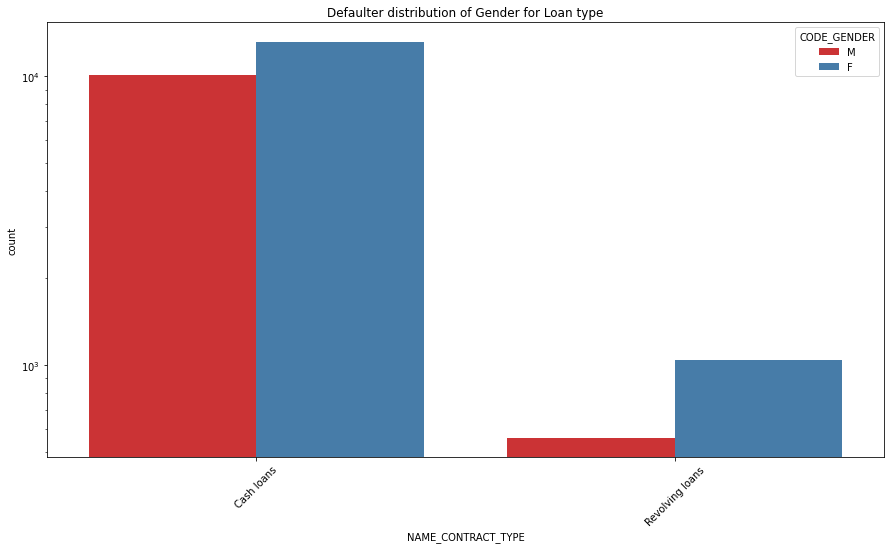

In [104]:

#we will plot countplot to see the distribution of Gender across loan types

plt.figure(figsize=(15,8))
ax = sns.countplot(data = Defaulter, x= 'NAME_CONTRACT_TYPE',hue= 'CODE_GENDER', palette="Set1", order= Defaulter.NAME_CONTRACT_TYPE.value_counts().index)
plt.title('Defaulter distribution of Gender for Loan type')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()

### We will plot heatmap to see the correlation between numerical coulumns

In [105]:
# Finding some correlation for numerical columns in Defaulter by creating pivot table

Defaulter_corr=Defaulter.iloc[0:,2:-5]
Defaulter_New=Defaulter_corr.corr(method='spearman')
Defaulter_New

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
CNT_CHILDREN                     1.000000         -0.004830    0.000181   
AMT_INCOME_TOTAL                -0.004830          1.000000    0.359272   
AMT_CREDIT                       0.000181          0.359272    1.000000   
AMT_ANNUITY                      0.033674          0.431637    0.811448   
AMT_GOODS_PRICE                 -0.007582          0.362474    0.976432   
REGION_POPULATION_RELATIVE      -0.031600          0.051512    0.039930   
Customer_Age                    -0.267852          0.007261    0.155241   
Employment_tenure               -0.006858          0.053808    0.107606   
CNT_FAM_MEMBERS                  0.823286          0.003789    0.067433   
REGION_RATING_CLIENT             0.041648         -0.157070   -0.047649   
REGION_RATING_CLIENT_W_CITY      0.043382         -0.174297   -0.059213   
OBS_30_CNT_SOCIAL_CIRCLE         0.032113          0.000693    0.018370   
DEF_30_CNT_SOCIAL_CIRCLE        -0.003332         -0.019327   -0.021980   
OBS_60_CNT_SOCIAL_CIRCLE         0.031317          0.000736    0.018230   
DEF_60_CNT_SOCIAL_CIRCLE        -0.005590         -0.023321   -0.029005   
AMT_REQ_CREDIT_BUREAU_YEAR      -0.016178          0.117061    0.010403   

                             AMT_ANNUITY  AMT_GOODS_PRICE  \
CNT_CHILDREN                    0.033674        -0.007582   
AMT_INCOME_TOTAL                0.431637         0.362474   
AMT_CREDIT                      0.811448         0.976432   
AMT_ANNUITY                     1.000000         0.804107   
AMT_GOODS_PRICE                 0.804107         1.000000   
REGION_POPULATION_RELATIVE      0.023303         0.054102   
Customer_Age                    0.030502         0.157739   
Employment_tenure               0.060220         0.116023   
CNT_FAM_MEMBERS                 0.088602         0.064594   
REGION_RATING_CLIENT           -0.057903        -0.056464   
REGION_RATING_CLIENT_W_CITY    -0.072973        -0.067310   
OBS_30_CNT_SOCIAL_CIRCLE        0.007434         0.020316   
DEF_30_CNT_SOCIAL_CIRCLE       -0.020237        -0.019472   
OBS_60_CNT_SOCIAL_CIRCLE        0.008257         0.020195   
DEF_60_CNT_SOCIAL_CIRCLE       -0.026829        -0.026174   
AMT_REQ_CREDIT_BUREAU_YEAR      0.007920         0.011834   

                             REGION_POPULATION_RELATIVE  Customer_Age  \
CNT_CHILDREN                                  -0.031600     -0.267852   
AMT_INCOME_TOTAL                               0.051512      0.007261   
AMT_CREDIT                                     0.039930      0.155241   
AMT_ANNUITY                                    0.023303      0.030502   
AMT_GOODS_PRICE                                0.054102      0.157739   
REGION_POPULATION_RELATIVE                     1.000000      0.046384   
Customer_Age                                   0.046384      1.000000   
Employment_tenure                              0.015256      0.256886   
CNT_FAM_MEMBERS                               -0.022693     -0.172181   
REGION_RATING_CLIENT                          -0.333060     -0.035384   
REGION_RATING_CLIENT_W_CITY                   -0.347478     -0.035621   
OBS_30_CNT_SOCIAL_CIRCLE                       0.030988     -0.006468   
DEF_30_CNT_SOCIAL_CIRCLE                       0.048981     -0.011860   
OBS_60_CNT_SOCIAL_CIRCLE                       0.030695     -0.005995   
DEF_60_CNT_SOCIAL_CIRCLE                       0.039017     -0.013508   
AMT_REQ_CREDIT_BUREAU_YEAR                     0.018375      0.086750   

                             Employment_tenure  CNT_FAM_MEMBERS  \
CNT_CHILDREN                         -0.006858         0.823286   
AMT_INCOME_TOTAL                      0.053808         0.003789   
AMT_CREDIT                            0.107606         0.067433   
AMT_ANNUITY                           0.060220         0.088602   
AMT_GOODS_PRICE                       0.116023         0.064594   
REGION_POPULATION_RELATIVE            0.015256        -0.022693   
Cust

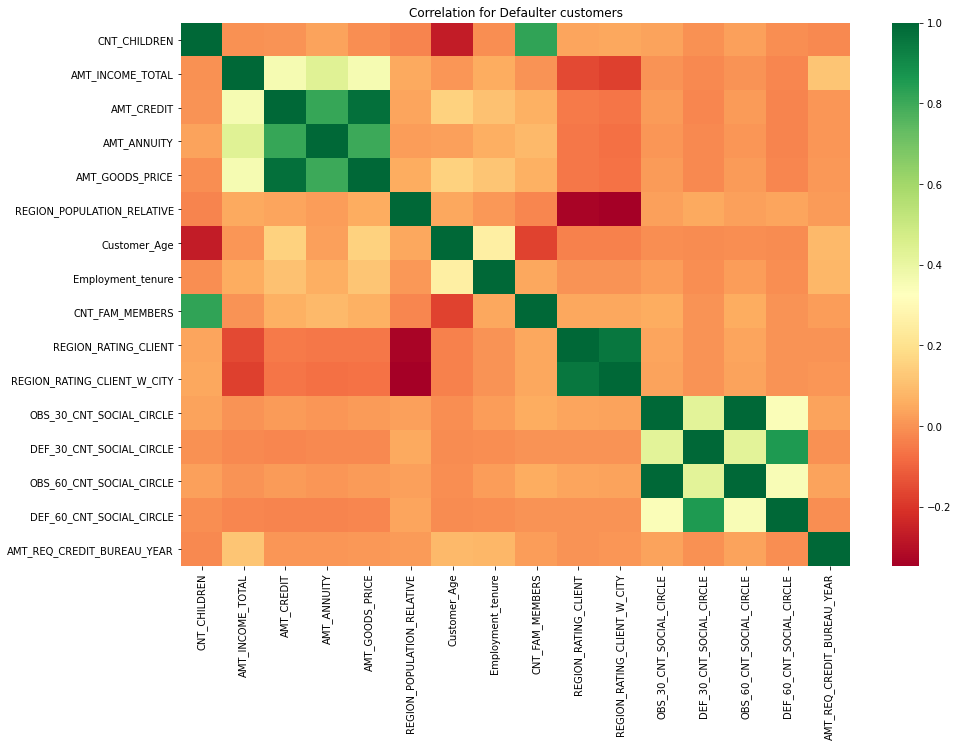

In [106]:
# we will draw a heat map now for defaulter dataset

plt.figure(figsize=(15, 10))
sns.heatmap(data= Defaulter_New, cmap="RdYlGn",annot=False)
plt.title('Correlation for Defaulter customers')
plt.yticks(rotation=0)
plt.show()

# Previous Dataset analysis

In [107]:
# Cleaning the missing data
# Checking null values % 

pd.set_option('display.max_rows',100)
previous_application.isnull().sum()/len(previous_application)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

##### Observation: From the above command, we can see there are many columns with more than 40% null values. For further analysis we will remove the columns with more than 20% null vlaues as they will not perform major role in analysis. 


In [108]:
#Rather than removing each column seperately, lets define a function which can remove columns with more than 20% null values. 

def missing_values1(previous_application, percentage):
    columns = previous_application.columns
    percent_missing = previous_application.isnull().sum() * 100 / len(previous_application)
    missing_value_application = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
    missing_drop = list(missing_value_application[missing_value_application.percent_missing > percentage].column_name)
    previous_application = previous_application.drop(missing_drop, axis=1)
    return previous_application

In [109]:
#we will create new dataframe previous_new which hava all columns other than 20% null values

previous_new= missing_values1(previous_application, percentage= 20)
pd.set_option('display.max_columns',73)
previous_new.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE  \
0                           Y                       1                    XAP   
1                           Y                       1                    XNA   
2                           Y                       1                    XNA   
3                           Y                       1                    XNA   
4                           Y                       1                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
0                XAP         Repeater              Mobile            POS   
1                XAP         Repeater                 XNA           Cash   
2                XAP         Repeater                 XNA           Cash   
3                XAP         Repeater                 XNA           Cash   
4                 HC         Repeater                 XNA           Cash   

  NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0               XNA             Country-wide                35   
1            x-sell           Contact center                -1   
2            x-sell  Credit and cash offices                -1   
3            x-sell  Credit and cash offices                -1   
4           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY NAME_YIELD_GROUP       PRODUCT_COMBINATION  
0         Connectivity           middle  POS mobile with interest  
1                  XNA       low_action          Cash X-Sell: low  
2                  XNA             high         Cash X-Sell: high  
3                  XNA           middle       Cash X-Sell: middle  
4                  XNA             high         Cash Street: high

In [110]:
#checning the shape of dataframe

previous_new.shape

(1670214, 23)

In [111]:
# checking for remaining null values

previous_new.isnull().sum()/len(previous_application)*100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000060
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.020716
dtype: float64

In [112]:
#checking NAME_CASH_LOAN_PURPOSE column

previous_new.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [113]:
# As Cash Loan Purpose data have 90% of values XAP and XNA so removing these values does not make any sense. So we will put it
#into other category. 

previous_new.NAME_CASH_LOAN_PURPOSE.replace({"XNA":"Other","XAP":"Other"}, inplace=True)
previous_new.NAME_CASH_LOAN_PURPOSE.value_counts()

Other                               1616187
Repairs                               23765
Urgent needs                           8412
Buying a used car                      2888
Building a house or an annex           2693
Everyday expenses                      2416
Medicine                               2174
Payments on other loans                1931
Education                              1573
Journey                                1239
Purchase of electronic equipment       1061
Buying a new car                       1012
Wedding / gift / holiday                962
Buying a home                           865
Car repairs                             797
Furniture                               749
Buying a holiday home / land            533
Business development                    426
Gasification / water supply             300
Buying a garage                         136
Hobby                                    55
Money for a third person                 25
Refusal to name the goal        

In [114]:
# checking column NAME_GOODS_CATEGORY

previous_new.NAME_GOODS_CATEGORY.value_counts()

XNA                         950809
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [115]:
# we will replace XNA values with Other as it is already there. 

previous_new.NAME_GOODS_CATEGORY.replace({"XNA":"Other"}, inplace=True)
previous_new.NAME_GOODS_CATEGORY.value_counts()

Other                       953363
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CATEGORY, dtype: int64

In [116]:
# Now merging the Application dataset with previous_new dataset

df_new=pd.merge(left=application_dropnull,right=previous_new,how='inner',on='SK_ID_CURR',suffixes='_x')

In [117]:
df_new.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100002       1          Cash loans           M            N   
1      100003       0          Cash loans           F            N   
2      100003       0          Cash loans           F            N   
3      100003       0          Cash loans           F            N   
4      100004       0     Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY  \
0               Y             0          202500.0     406597.5      24700.5   
1               N             0          270000.0    1293502.5      35698.5   
2               N             0          270000.0    1293502.5      35698.5   
3               N             0          270000.0    1293502.5      35698.5   
4               Y             0           67500.0     135000.0       6750.0   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2        1129500.0    State servant               Higher education   
3        1129500.0    State servant               Higher education   
4         135000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   Customer_Age  Employment_tenure OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0          25.9                1.7        Laborers              1.0   
1          45.9                3.3      Core staff              2.0   
2          45.9                3.3      Core staff              2.0   
3          45.9                3.3      Core staff              2.0   
4          52.2                0.6        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     1                            1                  School   
3                     1                            1                  School   
4                     2                            2              Government   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE  AMT_CREDIT_RANGE  \
0                         1.0    200000-225000     400000-450000   
1                         0.0    250000-275000  900000 and above   
2                         0.0    250000-275000  900000 and above   
3                         0.0    250000-275000  900000 and above   
4                         0.0      50000-75000          0-150000   

  AMT_GOODS_PRICE_RANGE Customer_Age_RANGE Employment_tenure_RANGE  \
0              0-400000              20-30                     0-5   
1       1100000-1150000              40-50                     0-5   
2       1100000-1150000     

In [118]:
# checking the shape of dataframe 

df_new.shape

(1413688, 55)

In [119]:
# Renaming the column names after merging

df_new1 = df_new.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT',
                         'NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV'}, axis=1)

In [120]:
# verifying 

df_new1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100003       0         Cash loans           F            N   
3      100003       0         Cash loans           F            N   
4      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               N             0          270000.0   1293502.5      35698.5   
3               N             0          270000.0   1293502.5      35698.5   
4               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2        1129500.0    State servant               Higher education   
3        1129500.0    State servant               Higher education   
4         135000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   Customer_Age  Employment_tenure OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0          25.9                1.7        Laborers              1.0   
1          45.9                3.3      Core staff              2.0   
2          45.9                3.3      Core staff              2.0   
3          45.9                3.3      Core staff              2.0   
4          52.2                0.6        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                     2                            2  Business Entity Type 3   
1                     1                            1                  School   
2                     1                            1                  School   
3                     1                            1                  School   
4                     2                            2              Government   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE  AMT_CREDIT_RANGE  \
0                         1.0    200000-225000     400000-450000   
1                         0.0    250000-275000  900000 and above   
2                         0.0    250000-275000  900000 and above   
3                         0.0    250000-275000  900000 and above   
4                         0.0      50000-75000          0-150000   

  AMT_GOODS_PRICE_RANGE Customer_Age_RANGE Employment_tenure_RANGE  \
0              0-400000              20-30                     0-5   
1       1100000-1150000              40-50                     0-5   
2       1100000-1150000              40-

In [121]:
# Removing unwanted columns for analysis

df_new1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY',"REGION_POPULATION_RELATIVE"
             ,"OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
             "CODE_REJECT_REASON", "CODE_REJECT_REASON","NAME_PORTFOLIO", "CHANNEL_TYPE", "SELLERPLACE_AREA",
             "NAME_YIELD_GROUP", "PRODUCT_COMBINATION"],axis=1,inplace=True)

In [122]:
df_new1.shape

(1413688, 39)

# Performing analysis in new combine data frame

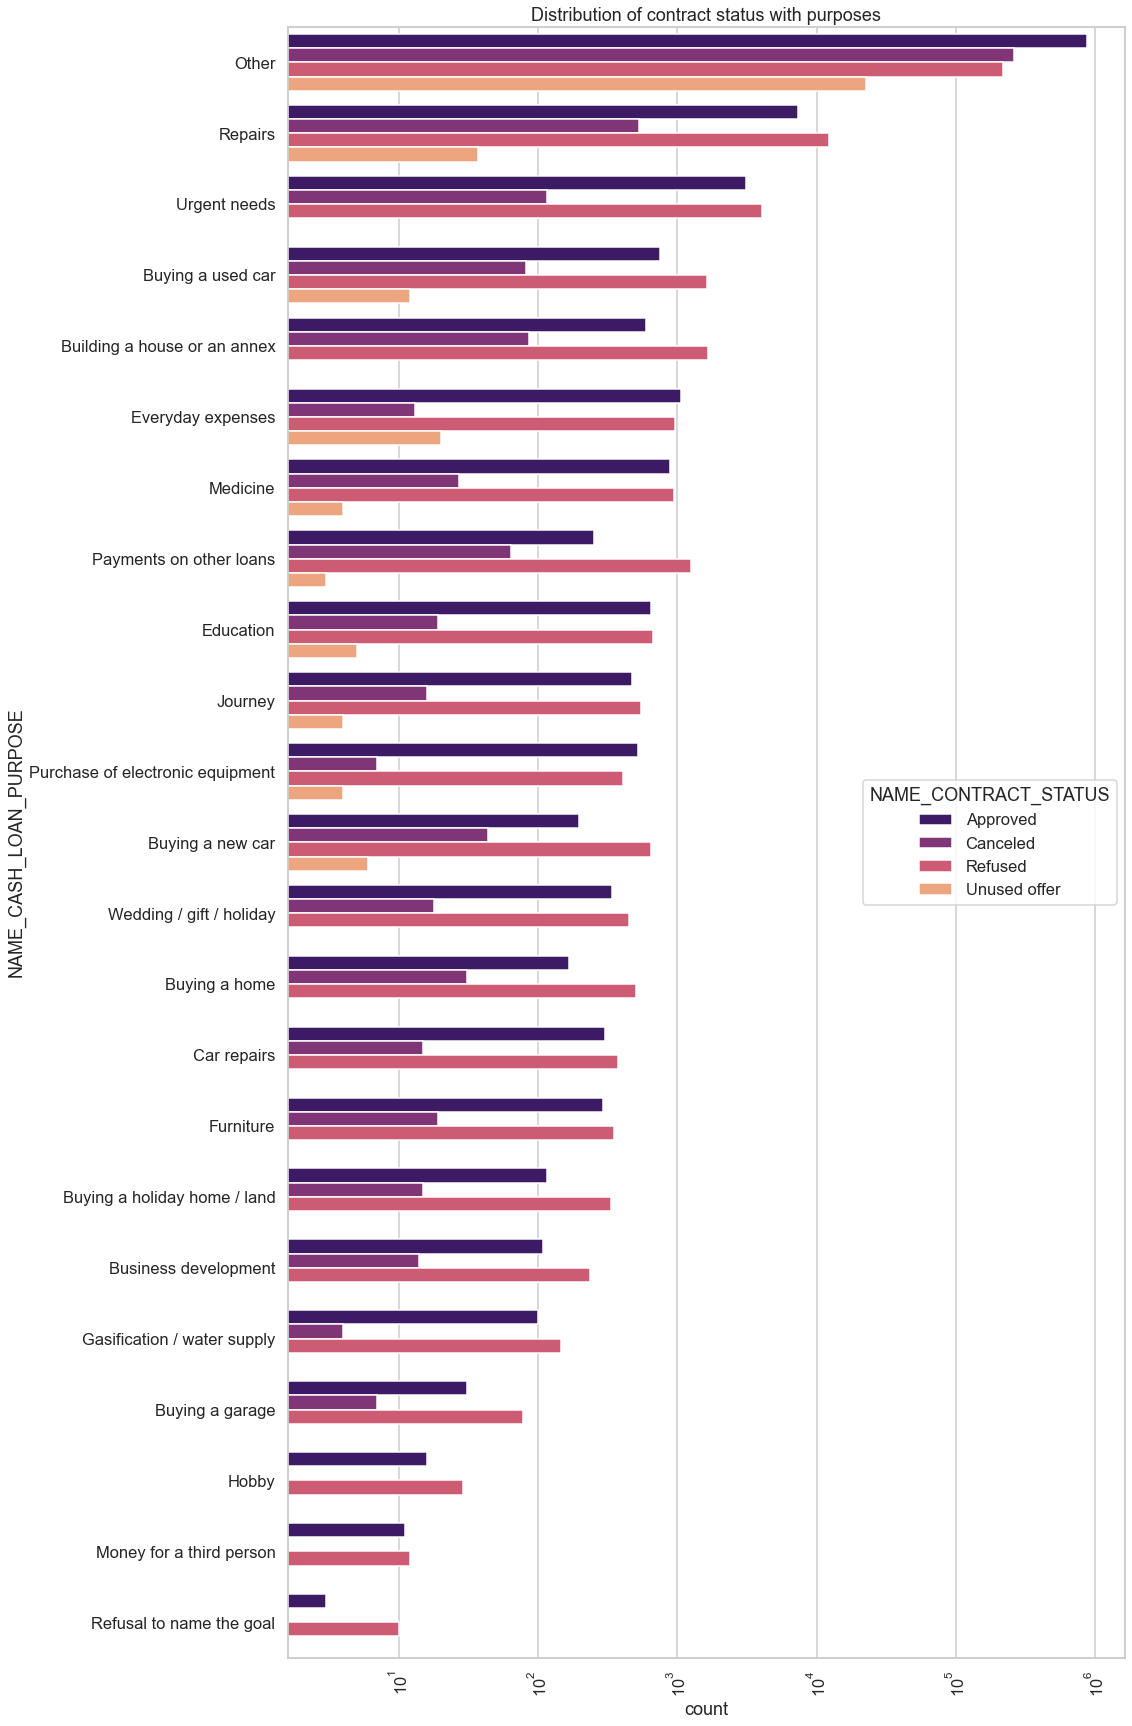

In [123]:
# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = df_new1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_new1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

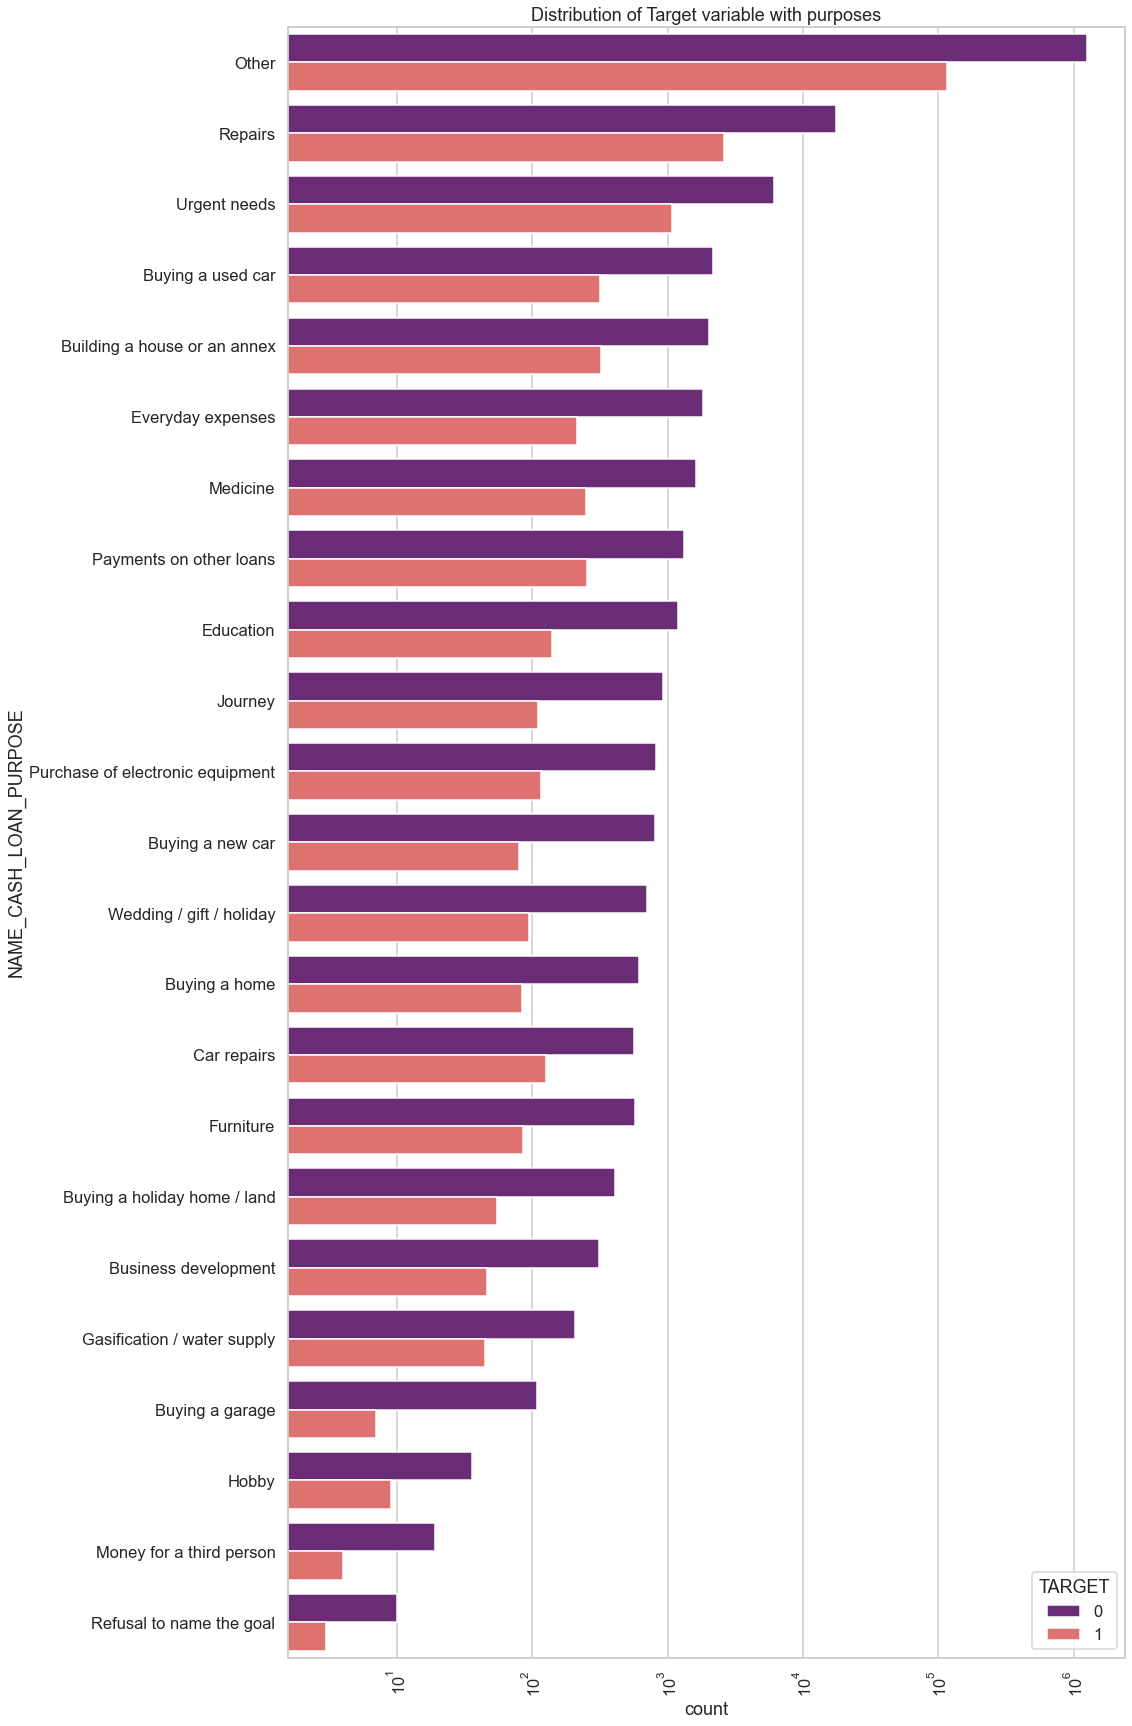

In [124]:
# Performing analysis with Target variable 

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Target variable with purposes')
ax = sns.countplot(data = df_new1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_new1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

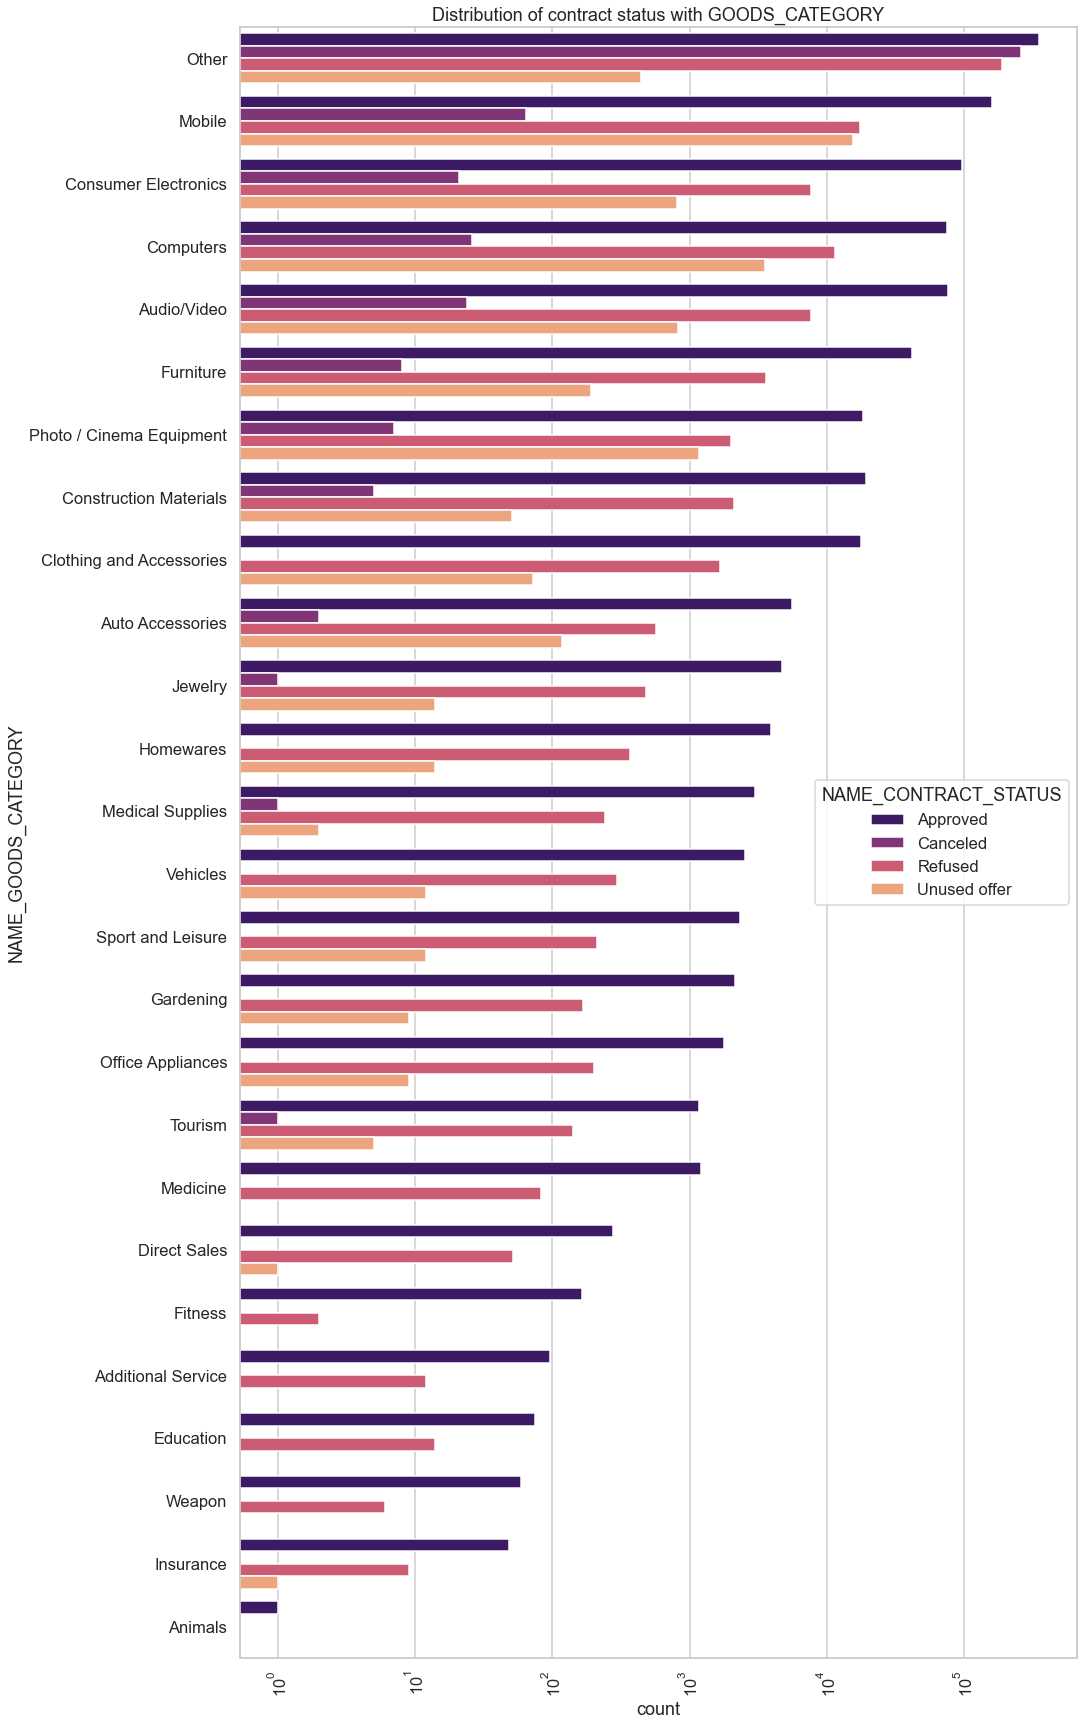

In [125]:
#Distribution of contract status with GOODS_CATEGORY

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with GOODS_CATEGORY')
ax = sns.countplot(data = df_new1, y= 'NAME_GOODS_CATEGORY', 
                   order=df_new1['NAME_GOODS_CATEGORY'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

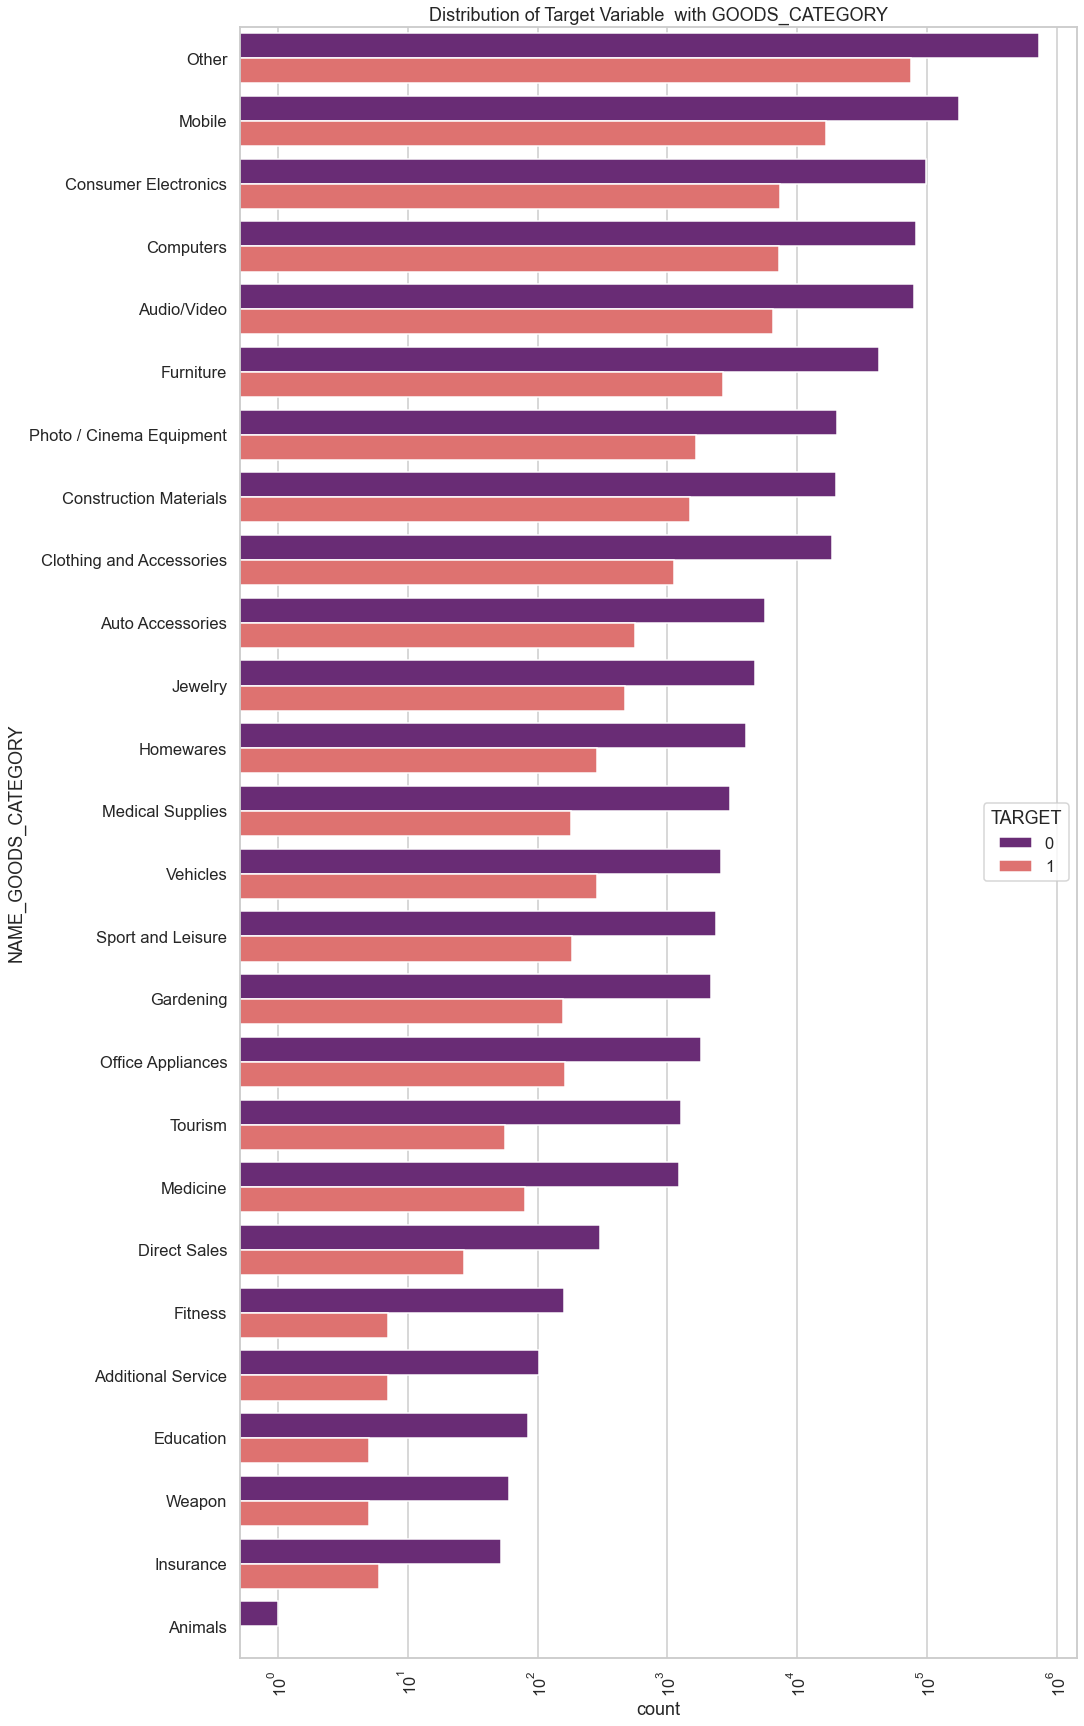

In [126]:
#Distribution of Target variable with GOODS_CATEGORY

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of Target Variable  with GOODS_CATEGORY')
ax = sns.countplot(data = df_new1, y= 'NAME_GOODS_CATEGORY', 
                   order=df_new1['NAME_GOODS_CATEGORY'].value_counts().index,hue = 'TARGET',palette='magma')

## We are now done with the correlation finding. We will wright our observations and conclusion in seperate PPT. 